In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import plotly.express as px

## Data Cleaning 

In [2]:
casesanddeaths_data= pd.read_csv('deaths covid.csv')
casesanddeaths_data.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2020-01-05,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-06,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-07,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-08,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-09,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
casesanddeaths_data = casesanddeaths_data[casesanddeaths_data['location'] == 'United States']
casesanddeaths_data.reset_index(drop=True, inplace=True)
casesanddeaths_data.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2020-01-05,United States,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-06,United States,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-07,United States,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-08,United States,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-09,United States,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
positivecases_data_0wk = pd.DataFrame(casesanddeaths_data[["weekly_cases"]])
positivecases_data_0wk.head()

,weekly_cases
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [5]:
positivecases_data_2wk = pd.DataFrame(casesanddeaths_data[["weekly_cases"]])
positivecases_data_2wk.head()

,weekly_cases
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [6]:
positivecases_data_3wk = pd.DataFrame(casesanddeaths_data[["weekly_cases"]])
positivecases_data_3wk.head()

,weekly_cases
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [7]:
positivecases_data_4wk = pd.DataFrame(casesanddeaths_data[["weekly_cases"]])
positivecases_data_4wk.head()

,weekly_cases
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [8]:
positivecases_data_5wk = pd.DataFrame(casesanddeaths_data[["weekly_cases"]])
positivecases_data_5wk.head()

,weekly_cases
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [9]:
# CLEANED FOR POSITIVE CASES
positivecases_data_0 = positivecases_data_0wk.drop(range(0, 378), inplace=True)
positivecases_data_0 = positivecases_data_0wk.iloc[0:878]
positivecases_data_0.reset_index(drop=True, inplace=True)
positivecases_data_0.head(10)

,weekly_cases
0,1589955.0
1,1589955.0
2,1589955.0
3,1589955.0
4,1589955.0
5,1589955.0
6,1589955.0
7,1265861.0
8,1265861.0
9,1265861.0


In [10]:
deaths_data = pd.DataFrame(casesanddeaths_data[[ "date", "location","weekly_deaths"]])
deaths_data.head()

,date,location,weekly_deaths
0,2020-01-05,United States,NaN
1,2020-01-06,United States,NaN
2,2020-01-07,United States,NaN
3,2020-01-08,United States,NaN
4,2020-01-09,United States,NaN


In [11]:
#CLEANED FOR DEATHS 
deaths_data.drop(range(0, 378), inplace=True)
deaths_data = deaths_data.iloc[0:878]
deaths_data.reset_index(drop=True, inplace=True)
deaths_data.head(100)

,date,location,weekly_deaths
0,2021-01-17,United States,23312.0
1,2021-01-18,United States,23312.0
2,2021-01-19,United States,23312.0
3,2021-01-20,United States,23312.0
4,2021-01-21,United States,23312.0
...,...,...,...
95,2021-04-22,United States,4875.0
96,2021-04-23,United States,4875.0
97,2021-04-24,United States,4875.0
98,2021-04-25,United States,4721.0


In [12]:
vaccination_data= pd.read_csv('vaccination covid.csv')
vaccination_data.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,United States,2020-12-13,Pfizer/BioNTech,https://data.cdc.gov/Vaccinations/COVID-19-Vac...,45620,36817,9669,0.0
1,United States,2020-12-14,Pfizer/BioNTech,https://data.cdc.gov/Vaccinations/COVID-19-Vac...,50468,41465,9833,0.0
2,United States,2020-12-15,Pfizer/BioNTech,https://data.cdc.gov/Vaccinations/COVID-19-Vac...,98353,87883,10161,0.0
3,United States,2020-12-16,Pfizer/BioNTech,https://data.cdc.gov/Vaccinations/COVID-19-Vac...,258504,243398,10679,0.0
4,United States,2020-12-17,Pfizer/BioNTech,https://data.cdc.gov/Vaccinations/COVID-19-Vac...,533742,511644,11505,0.0


In [13]:
totalvaccination_data_0wk = pd.DataFrame(vaccination_data[["total_vaccinations"]])
totalvaccination_data_0wk.head()

,total_vaccinations
0,45620
1,50468
2,98353
3,258504
4,533742


In [14]:
totalvaccination_data_3wk = pd.DataFrame(vaccination_data[["total_vaccinations"]])
totalvaccination_data_3wk.head()

,total_vaccinations
0,45620
1,50468
2,98353
3,258504
4,533742


In [15]:
#CLEANED FOR VACCINATIONS 
totalvaccination_data_0 = totalvaccination_data_0wk.drop(range(0, 35), inplace=True)
totalvaccination_data_0 = totalvaccination_data_0wk.iloc[0:878]
totalvaccination_data_0.reset_index(drop=True, inplace=True)
totalvaccination_data_0.head(100)

,total_vaccinations
0,19218336
1,20110141
2,21463944
3,23079181
4,24726816
...,...
95,242291910
96,245604243
97,247820516
98,248816796


In [16]:
hospitalisation_data= pd.read_csv('hospitalisations covid.csv')
hospitalisation_data.head()

,Entity,Code,Day,Daily hospital occupancy
0,Australia,AUS,2020-03-31,426
1,Australia,AUS,2020-04-01,441
2,Australia,AUS,2020-04-02,415
3,Australia,AUS,2020-04-03,457
4,Australia,AUS,2020-04-04,490


In [17]:
hospitalisation_data_0wk = hospitalisation_data[hospitalisation_data['Entity'] == 'United States']
hospitalisation_data_0wk.reset_index(drop=True, inplace=True)
hospitalisation_data_0wk.head()

,Entity,Code,Day,Daily hospital occupancy
0,United States,USA,2020-07-15,33760
1,United States,USA,2020-07-16,38539
2,United States,USA,2020-07-17,40062
3,United States,USA,2020-07-18,40376
4,United States,USA,2020-07-19,37897


In [18]:
hospitalisation_data_2wk = hospitalisation_data[hospitalisation_data['Entity'] == 'United States']
hospitalisation_data_2wk.reset_index(drop=True, inplace=True)
hospitalisation_data_2wk.head()

,Entity,Code,Day,Daily hospital occupancy
0,United States,USA,2020-07-15,33760
1,United States,USA,2020-07-16,38539
2,United States,USA,2020-07-17,40062
3,United States,USA,2020-07-18,40376
4,United States,USA,2020-07-19,37897


In [19]:
hospitalisation_data_3wk = hospitalisation_data[hospitalisation_data['Entity'] == 'United States']
hospitalisation_data_3wk.reset_index(drop=True, inplace=True)
hospitalisation_data_3wk.head()

,Entity,Code,Day,Daily hospital occupancy
0,United States,USA,2020-07-15,33760
1,United States,USA,2020-07-16,38539
2,United States,USA,2020-07-17,40062
3,United States,USA,2020-07-18,40376
4,United States,USA,2020-07-19,37897


In [20]:
hospitalisation_data_4wk = hospitalisation_data[hospitalisation_data['Entity'] == 'United States']
hospitalisation_data_4wk.reset_index(drop=True, inplace=True)
hospitalisation_data_4wk.head()

,Entity,Code,Day,Daily hospital occupancy
0,United States,USA,2020-07-15,33760
1,United States,USA,2020-07-16,38539
2,United States,USA,2020-07-17,40062
3,United States,USA,2020-07-18,40376
4,United States,USA,2020-07-19,37897


In [21]:
hospitalisation_data_5wk = hospitalisation_data[hospitalisation_data['Entity'] == 'United States']
hospitalisation_data_5wk.reset_index(drop=True, inplace=True)
hospitalisation_data_5wk.head()

,Entity,Code,Day,Daily hospital occupancy
0,United States,USA,2020-07-15,33760
1,United States,USA,2020-07-16,38539
2,United States,USA,2020-07-17,40062
3,United States,USA,2020-07-18,40376
4,United States,USA,2020-07-19,37897


In [22]:
hospitalisation_data_0wk =pd.DataFrame(hospitalisation_data_0wk)
hospitalisation_data_0 = hospitalisation_data_0wk.drop(range(0,186 ), inplace=True)
hospitalisation_data_0 = hospitalisation_data_0wk.iloc[0:878]
hospitalisation_data_0.reset_index(drop=True, inplace=True)
hospitalisation_data_0.head()

,Entity,Code,Day,Daily hospital occupancy
0,United States,USA,2021-01-17,120830
1,United States,USA,2021-01-18,120422
2,United States,USA,2021-01-19,119384
3,United States,USA,2021-01-20,117115
4,United States,USA,2021-01-21,114097


In [23]:
#CLEANED DATA FOR HOSPITALISATIONS
hospitalisations_data_0 = pd.DataFrame(hospitalisation_data_0wk[[ "Daily hospital occupancy"]])
hospitalisations_data_0.head()

,Daily hospital occupancy
186,120830
187,120422
188,119384
189,117115
190,114097


In [24]:
#concatenate all the clean datas
concatenated_dataframes = pd.concat(
    [
        deaths_data.reset_index(drop=True),
        positivecases_data_0.reset_index(drop=True),
        hospitalisations_data_0.reset_index(drop=True),
        totalvaccination_data_0.reset_index(drop=True)
    ],
    axis=1
)
concatenated_dataframes.reset_index(drop=True, inplace=True)
concatenated_dataframes.head(10)


,date,location,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,2021-01-17,United States,23312.0,1589955.0,120830,19218336.0
1,2021-01-18,United States,23312.0,1589955.0,120422,20110141.0
2,2021-01-19,United States,23312.0,1589955.0,119384,21463944.0
3,2021-01-20,United States,23312.0,1589955.0,117115,23079181.0
4,2021-01-21,United States,23312.0,1589955.0,114097,24726816.0
5,2021-01-22,United States,23312.0,1589955.0,111831,26373687.0
6,2021-01-23,United States,23312.0,1589955.0,108122,27287063.0
7,2021-01-24,United States,22495.0,1265861.0,107004,27690932.0
8,2021-01-25,United States,22495.0,1265861.0,106268,29075771.0
9,2021-01-26,United States,22495.0,1265861.0,104627,30746637.0


## Time Series

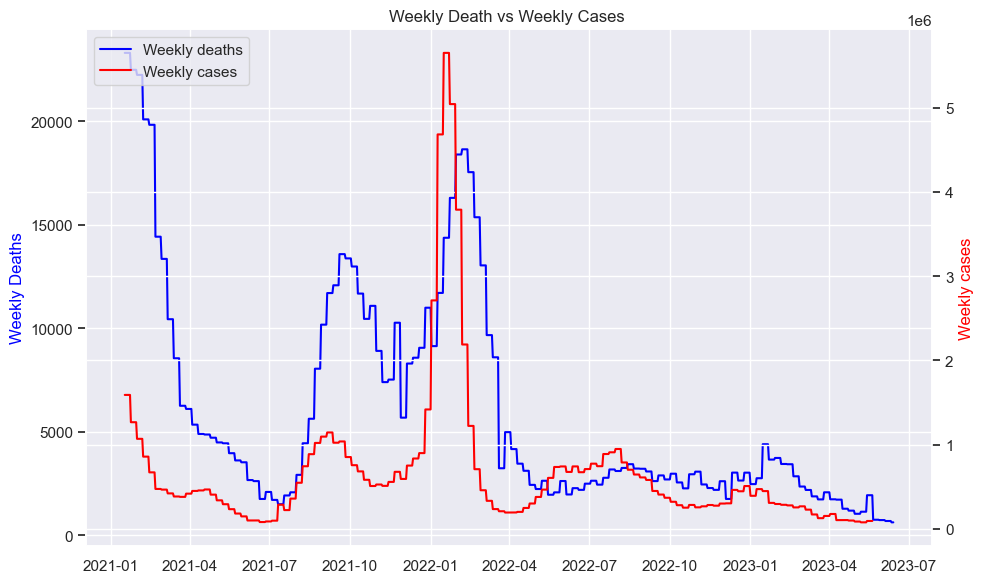

In [25]:
#Weekly Death Vs Weekly Cases
concatenated_dataframes['date'] = pd.to_datetime(concatenated_dataframes['date'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(concatenated_dataframes['date'], concatenated_dataframes['weekly_deaths'], label='Weekly deaths', color='blue')
ax1.set_ylabel('Weekly Deaths', color='blue')

ax2 = ax1.twinx()
ax2.plot(concatenated_dataframes['date'], concatenated_dataframes['weekly_cases'], label='Weekly cases', color='red')
ax2.set_ylabel('Weekly cases', color='red')

plt.title('Weekly Death vs Weekly Cases ')
plt.xlabel('Date')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

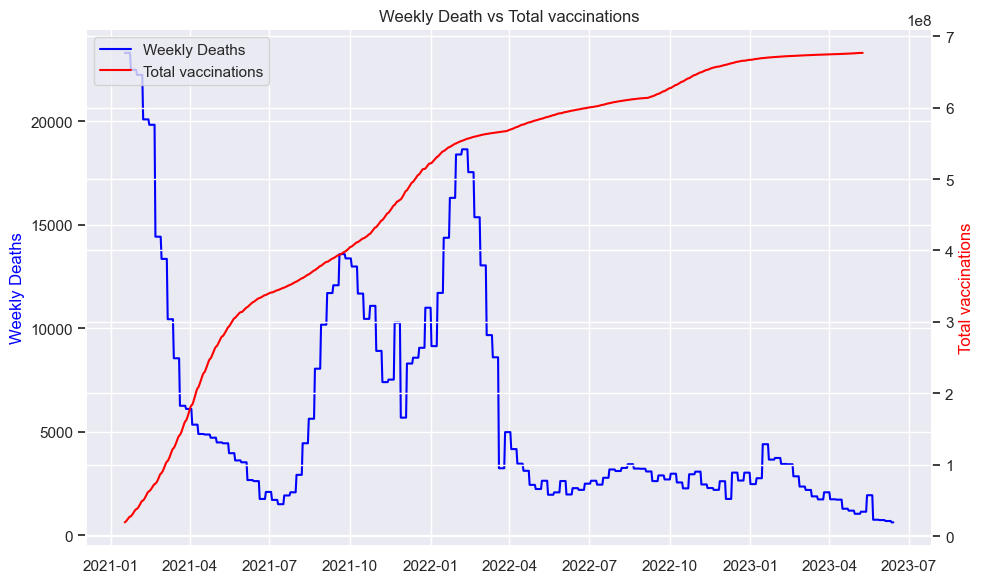

In [26]:
#Weekly Death Vs Total Vaccination 
concatenated_dataframes['date'] = pd.to_datetime(concatenated_dataframes['date'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(concatenated_dataframes['date'], concatenated_dataframes['weekly_deaths'], label='Weekly Deaths', color='blue')
ax1.set_ylabel('Weekly Deaths', color='blue')

ax2 = ax1.twinx()
ax2.plot(concatenated_dataframes['date'], concatenated_dataframes['total_vaccinations'], label='Total vaccinations', color='red')
ax2.set_ylabel('Total vaccinations', color='red')

plt.title('Weekly Death vs Total vaccinations')
plt.xlabel('Date')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

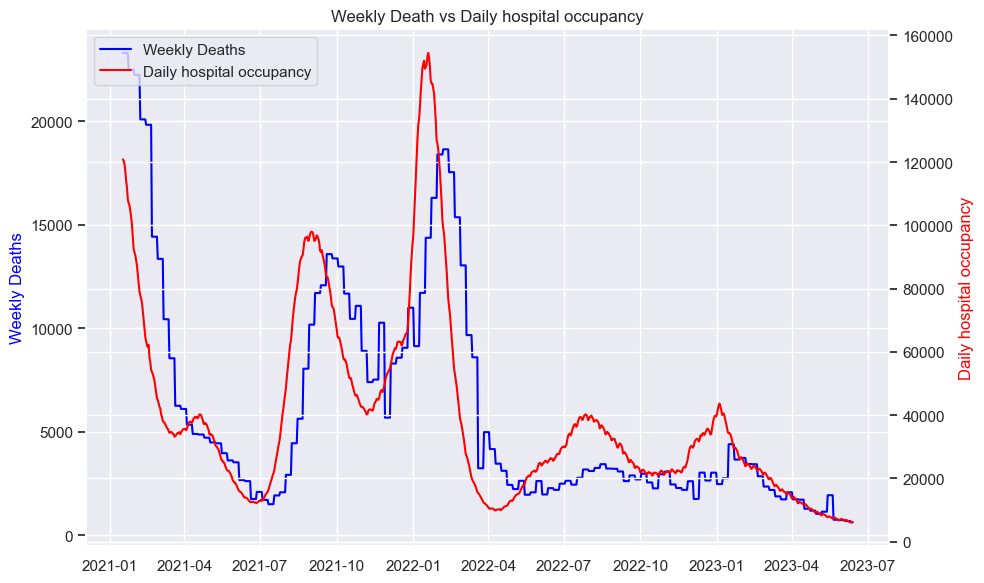

In [27]:
#Weekly Death Vs Daily Hospital Occupancy 
concatenated_dataframes['date'] = pd.to_datetime(concatenated_dataframes['date'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(concatenated_dataframes['date'], concatenated_dataframes['weekly_deaths'], label='Weekly Deaths', color='blue')
ax1.set_ylabel('Weekly Deaths', color='blue')

ax2 = ax1.twinx()
ax2.plot(concatenated_dataframes['date'], concatenated_dataframes['Daily hospital occupancy'], label='Daily hospital occupancy', color='red')
ax2.set_ylabel('Daily hospital occupancy', color='red')

plt.title('Weekly Death vs Daily hospital occupancy')
plt.xlabel('Date')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

## PairPlot and Correlation of the factors 

In [28]:
overall = pd.DataFrame(concatenated_dataframes[[ "weekly_deaths","weekly_cases","Daily hospital occupancy","total_vaccinations"]])
overall.head()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,23312.0,1589955.0,120830,19218336.0
1,23312.0,1589955.0,120422,20110141.0
2,23312.0,1589955.0,119384,21463944.0
3,23312.0,1589955.0,117115,23079181.0
4,23312.0,1589955.0,114097,24726816.0


In [29]:
overall.corr()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
weekly_deaths,1.000000,0.532308,0.754465,-0.548747
weekly_cases,0.532308,1.000000,0.842447,-0.041242
Daily hospital occupancy,0.754465,0.842447,1.000000,-0.326348
total_vaccinations,-0.548747,-0.041242,-0.326348,1.000000


<Axes: >

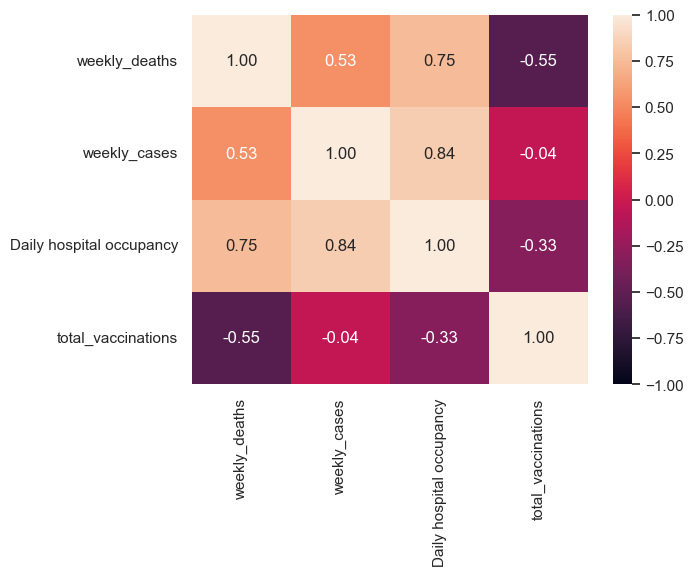

In [30]:
#Week 0 Correlation
sb.heatmap(overall.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

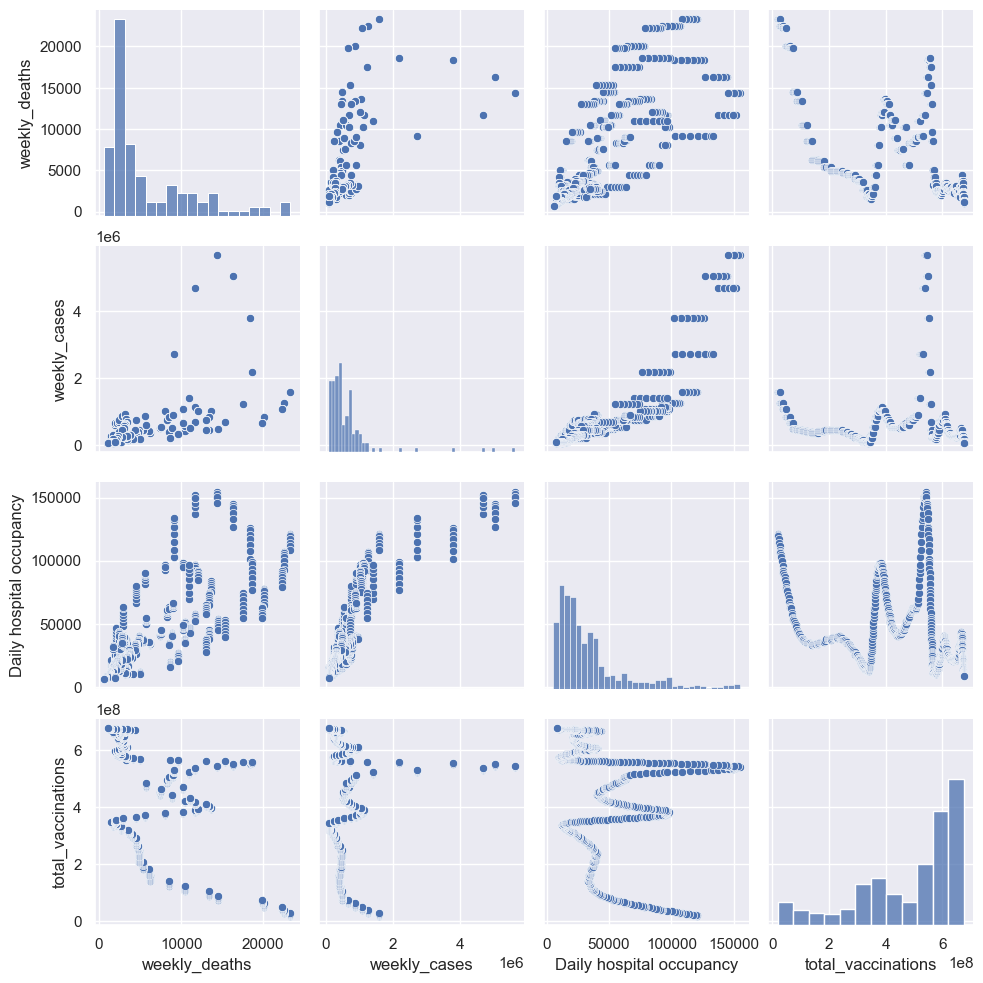

In [31]:
#Week 0 Pairplot
sb.pairplot(data = overall)

## Shift positive cases 2 weeks up 

In [32]:
# shift of clean data of positive cases
positivecases_data_2 = positivecases_data_2wk.drop(range(0, 364), inplace=True)
positivecases_data_2 = positivecases_data_2wk.iloc[0:878]
positivecases_data_2.reset_index(drop=True, inplace=True)
positivecases_data_2.head(10)

,weekly_cases
0,1380995.0
1,1380995.0
2,1380995.0
3,1380995.0
4,1380995.0
5,1380995.0
6,1380995.0
7,1667151.0
8,1667151.0
9,1667151.0


In [33]:
#Concatenated with the other factors
concatenated_dataframes = pd.concat(
    [
        deaths_data.reset_index(drop=True),
        positivecases_data_2.reset_index(drop=True),
        hospitalisations_data_0.reset_index(drop=True),
        totalvaccination_data_0.reset_index(drop=True)
    ],
    axis=1
)
concatenated_dataframes.reset_index(drop=True, inplace=True)
concatenated_dataframes.head(10)

,date,location,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,2021-01-17,United States,23312.0,1380995.0,120830,19218336.0
1,2021-01-18,United States,23312.0,1380995.0,120422,20110141.0
2,2021-01-19,United States,23312.0,1380995.0,119384,21463944.0
3,2021-01-20,United States,23312.0,1380995.0,117115,23079181.0
4,2021-01-21,United States,23312.0,1380995.0,114097,24726816.0
5,2021-01-22,United States,23312.0,1380995.0,111831,26373687.0
6,2021-01-23,United States,23312.0,1380995.0,108122,27287063.0
7,2021-01-24,United States,22495.0,1667151.0,107004,27690932.0
8,2021-01-25,United States,22495.0,1667151.0,106268,29075771.0
9,2021-01-26,United States,22495.0,1667151.0,104627,30746637.0


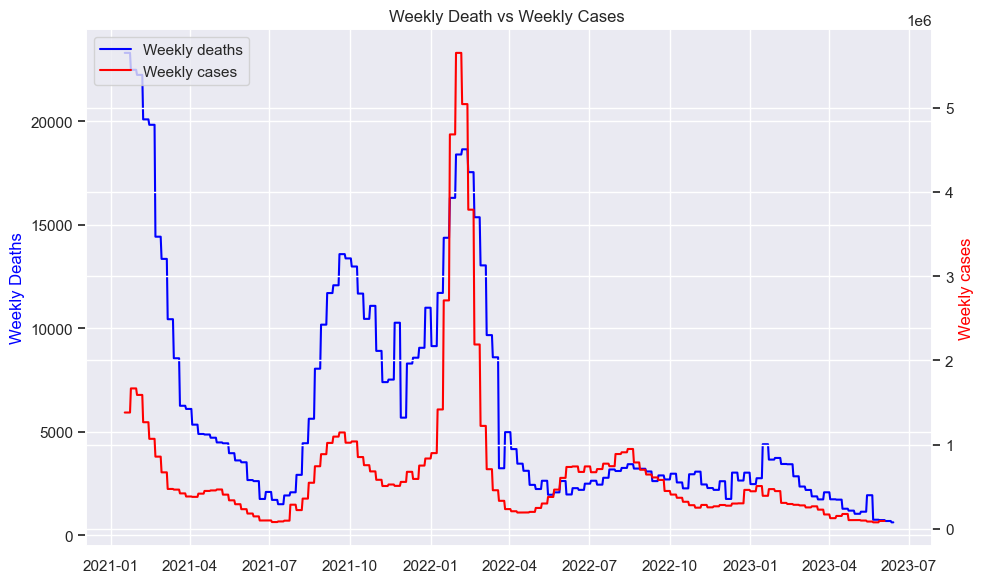

In [34]:
#Time Series with Weekly Death
concatenated_dataframes['date'] = pd.to_datetime(concatenated_dataframes['date'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(concatenated_dataframes['date'], concatenated_dataframes['weekly_deaths'], label='Weekly deaths', color='blue')
ax1.set_ylabel('Weekly Deaths', color='blue')

ax2 = ax1.twinx()
ax2.plot(concatenated_dataframes['date'], concatenated_dataframes['weekly_cases'], label='Weekly cases', color='red')
ax2.set_ylabel('Weekly cases', color='red')

plt.title('Weekly Death vs Weekly Cases ')
plt.xlabel('Date')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
overall2 = pd.DataFrame(concatenated_dataframes[[ "weekly_deaths","weekly_cases","Daily hospital occupancy","total_vaccinations"]])
overall2.head()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,23312.0,1380995.0,120830,19218336.0
1,23312.0,1380995.0,120422,20110141.0
2,23312.0,1380995.0,119384,21463944.0
3,23312.0,1380995.0,117115,23079181.0
4,23312.0,1380995.0,114097,24726816.0


In [36]:
overall2.corr()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
weekly_deaths,1.000000,0.685779,0.754465,-0.548747
weekly_cases,0.685779,1.000000,0.669904,-0.068831
Daily hospital occupancy,0.754465,0.669904,1.000000,-0.326348
total_vaccinations,-0.548747,-0.068831,-0.326348,1.000000


<Axes: >

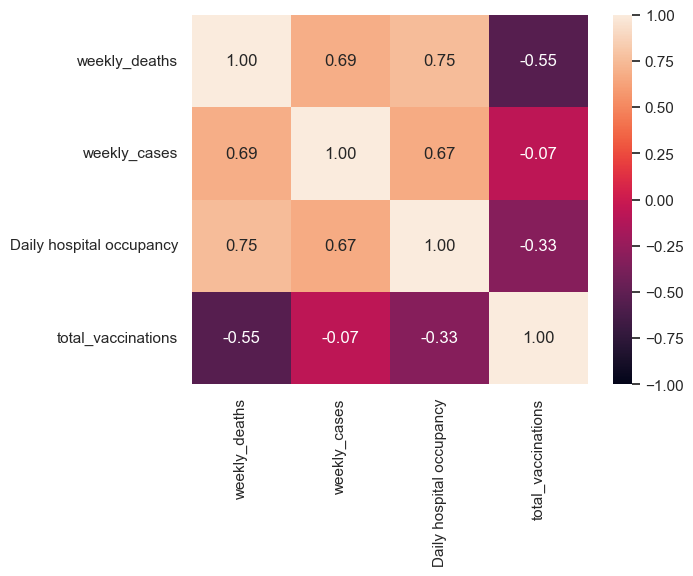

In [37]:
#correlation after shifting
sb.heatmap(overall2.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

## Shift positive cases 3 weeks up 

In [38]:
# CLEANED FOR POSITIVE CASES
positivecases_data_3 = positivecases_data_3wk.drop(range(0, 357), inplace=True)
positivecases_data_3 = positivecases_data_3wk.iloc[0:878]
positivecases_data_3.reset_index(drop=True, inplace=True)
positivecases_data_3.head(10)

,weekly_cases
0,1360122.0
1,1360122.0
2,1360122.0
3,1360122.0
4,1360122.0
5,1360122.0
6,1360122.0
7,1380995.0
8,1380995.0
9,1380995.0


In [39]:
#Concate with the other factors
concatenated_dataframes = pd.concat(
    [
        deaths_data.reset_index(drop=True),
        positivecases_data_3.reset_index(drop=True),
        hospitalisations_data_0.reset_index(drop=True),
        totalvaccination_data_0.reset_index(drop=True)
    ],
    axis=1
)
concatenated_dataframes.reset_index(drop=True, inplace=True)
concatenated_dataframes.head(10)

,date,location,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,2021-01-17,United States,23312.0,1360122.0,120830,19218336.0
1,2021-01-18,United States,23312.0,1360122.0,120422,20110141.0
2,2021-01-19,United States,23312.0,1360122.0,119384,21463944.0
3,2021-01-20,United States,23312.0,1360122.0,117115,23079181.0
4,2021-01-21,United States,23312.0,1360122.0,114097,24726816.0
5,2021-01-22,United States,23312.0,1360122.0,111831,26373687.0
6,2021-01-23,United States,23312.0,1360122.0,108122,27287063.0
7,2021-01-24,United States,22495.0,1380995.0,107004,27690932.0
8,2021-01-25,United States,22495.0,1380995.0,106268,29075771.0
9,2021-01-26,United States,22495.0,1380995.0,104627,30746637.0


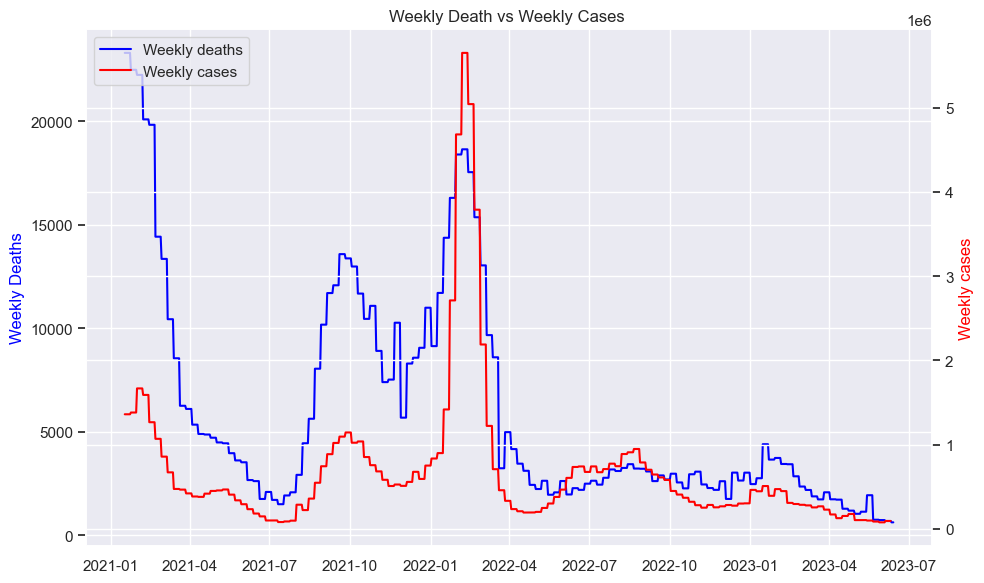

In [40]:
#timeseries with weekly death
concatenated_dataframes['date'] = pd.to_datetime(concatenated_dataframes['date'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(concatenated_dataframes['date'], concatenated_dataframes['weekly_deaths'], label='Weekly deaths', color='blue')
ax1.set_ylabel('Weekly Deaths', color='blue')

ax2 = ax1.twinx()
ax2.plot(concatenated_dataframes['date'], concatenated_dataframes['weekly_cases'], label='Weekly cases', color='red')
ax2.set_ylabel('Weekly cases', color='red')

plt.title('Weekly Death vs Weekly Cases ')
plt.xlabel('Date')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
overall3 = pd.DataFrame(concatenated_dataframes[[ "weekly_deaths","weekly_cases","Daily hospital occupancy","total_vaccinations"]])
overall3.head()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,23312.0,1360122.0,120830,19218336.0
1,23312.0,1360122.0,120422,20110141.0
2,23312.0,1360122.0,119384,21463944.0
3,23312.0,1360122.0,117115,23079181.0
4,23312.0,1360122.0,114097,24726816.0


In [42]:
overall3.corr()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
weekly_deaths,1.000000,0.698417,0.754465,-0.548747
weekly_cases,0.698417,1.000000,0.523337,-0.079034
Daily hospital occupancy,0.754465,0.523337,1.000000,-0.326348
total_vaccinations,-0.548747,-0.079034,-0.326348,1.000000


<Axes: >

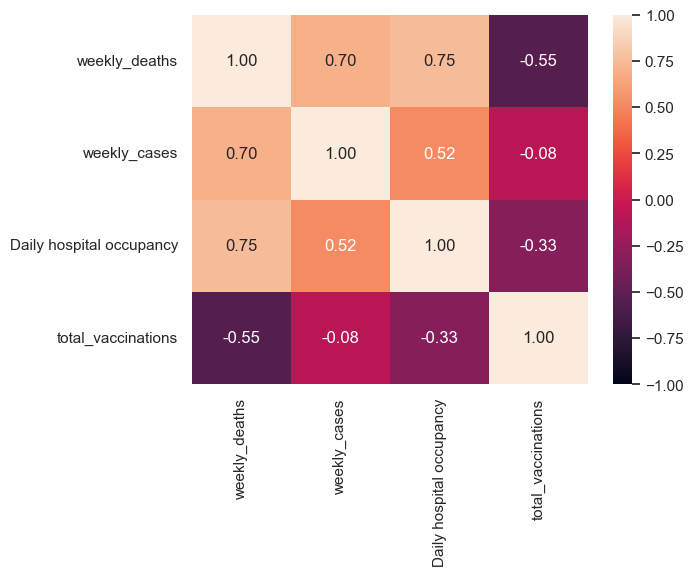

In [43]:
#correlation after shifting 
sb.heatmap(overall3.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

## Shift positive cases 4 weeks up 

In [44]:
# CLEANED FOR POSITIVE CASES
positivecases_data_4 = positivecases_data_4wk.drop(range(0, 350), inplace=True)
positivecases_data_4 = positivecases_data_4wk.iloc[0:878]
positivecases_data_4.reset_index(drop=True, inplace=True)
positivecases_data_4.head(10)

,weekly_cases
0,1517928.0
1,1517928.0
2,1517928.0
3,1517928.0
4,1517928.0
5,1517928.0
6,1517928.0
7,1360122.0
8,1360122.0
9,1360122.0


In [45]:
#Concatenate the dataframe after shifting
concatenated_dataframes = pd.concat(
    [
        deaths_data.reset_index(drop=True),
        positivecases_data_4.reset_index(drop=True),
        hospitalisations_data_0.reset_index(drop=True),
        totalvaccination_data_0.reset_index(drop=True)
    ],
    axis=1
)
concatenated_dataframes.reset_index(drop=True, inplace=True)
concatenated_dataframes.head(10)

,date,location,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,2021-01-17,United States,23312.0,1517928.0,120830,19218336.0
1,2021-01-18,United States,23312.0,1517928.0,120422,20110141.0
2,2021-01-19,United States,23312.0,1517928.0,119384,21463944.0
3,2021-01-20,United States,23312.0,1517928.0,117115,23079181.0
4,2021-01-21,United States,23312.0,1517928.0,114097,24726816.0
5,2021-01-22,United States,23312.0,1517928.0,111831,26373687.0
6,2021-01-23,United States,23312.0,1517928.0,108122,27287063.0
7,2021-01-24,United States,22495.0,1360122.0,107004,27690932.0
8,2021-01-25,United States,22495.0,1360122.0,106268,29075771.0
9,2021-01-26,United States,22495.0,1360122.0,104627,30746637.0


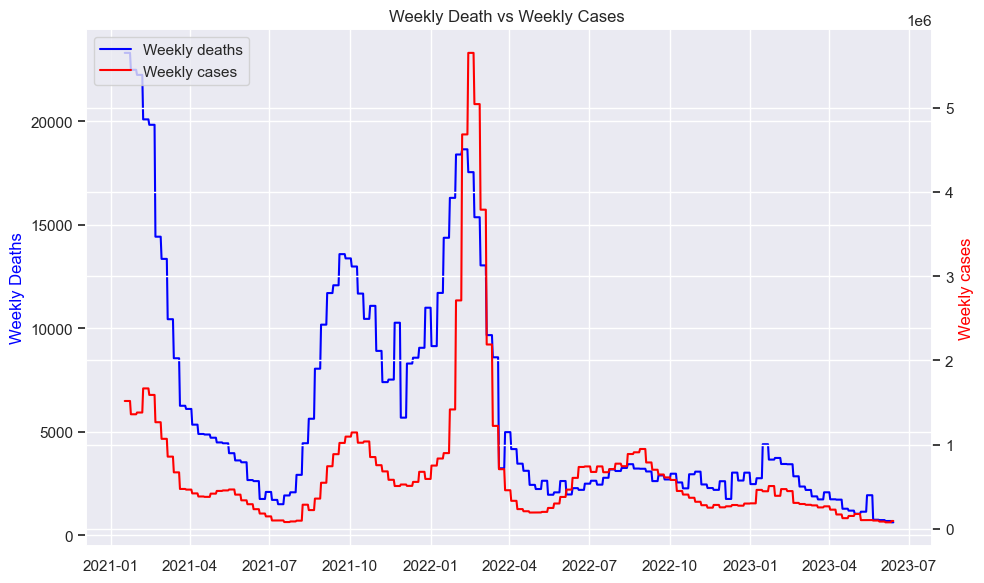

In [46]:
#time series with Weekly Death 
concatenated_dataframes['date'] = pd.to_datetime(concatenated_dataframes['date'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(concatenated_dataframes['date'], concatenated_dataframes['weekly_deaths'], label='Weekly deaths', color='blue')
ax1.set_ylabel('Weekly Deaths', color='blue')

ax2 = ax1.twinx()
ax2.plot(concatenated_dataframes['date'], concatenated_dataframes['weekly_cases'], label='Weekly cases', color='red')
ax2.set_ylabel('Weekly cases', color='red')

plt.title('Weekly Death vs Weekly Cases ')
plt.xlabel('Date')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
overall4 = pd.DataFrame(concatenated_dataframes[[ "weekly_deaths","weekly_cases","Daily hospital occupancy","total_vaccinations"]])
overall4.head()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,23312.0,1517928.0,120830,19218336.0
1,23312.0,1517928.0,120422,20110141.0
2,23312.0,1517928.0,119384,21463944.0
3,23312.0,1517928.0,117115,23079181.0
4,23312.0,1517928.0,114097,24726816.0


In [48]:
overall4.corr()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
weekly_deaths,1.000000,0.669922,0.754465,-0.548747
weekly_cases,0.669922,1.000000,0.376901,-0.092912
Daily hospital occupancy,0.754465,0.376901,1.000000,-0.326348
total_vaccinations,-0.548747,-0.092912,-0.326348,1.000000


<Axes: >

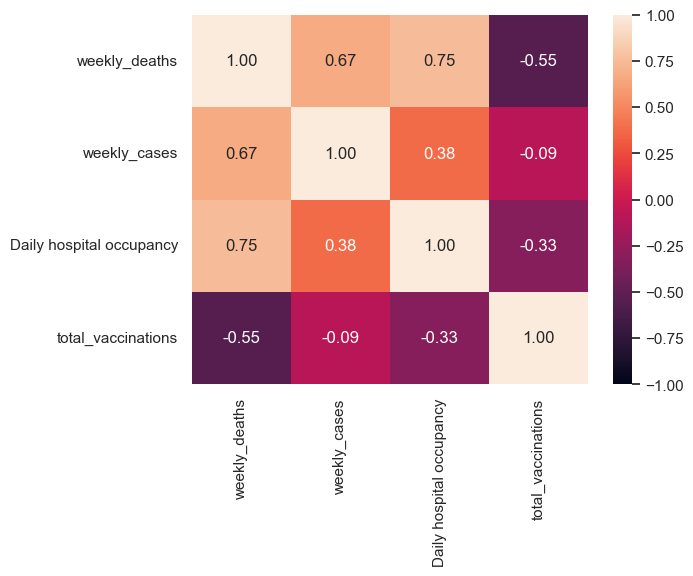

In [49]:
# correlation after shifting 
sb.heatmap(overall4.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

## shift positive cases 5 weeks up 

In [50]:
# CLEANED FOR POSITIVE CASES
positivecases_data_5 = positivecases_data_5wk.drop(range(0, 343), inplace=True)
positivecases_data_5 = positivecases_data_5wk.iloc[0:878]
positivecases_data_5.reset_index(drop=True, inplace=True)
positivecases_data_5.head(10)

,weekly_cases
0,1468482.0
1,1468482.0
2,1468482.0
3,1468482.0
4,1468482.0
5,1468482.0
6,1468482.0
7,1517928.0
8,1517928.0
9,1517928.0


In [51]:
# correlation after shifting 
concatenated_dataframes = pd.concat(
    [
        deaths_data.reset_index(drop=True),
        positivecases_data_5.reset_index(drop=True),
        hospitalisations_data_0.reset_index(drop=True),
        totalvaccination_data_0.reset_index(drop=True)
    ],
    axis=1
)
concatenated_dataframes.reset_index(drop=True, inplace=True)
concatenated_dataframes.head(10)

,date,location,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,2021-01-17,United States,23312.0,1468482.0,120830,19218336.0
1,2021-01-18,United States,23312.0,1468482.0,120422,20110141.0
2,2021-01-19,United States,23312.0,1468482.0,119384,21463944.0
3,2021-01-20,United States,23312.0,1468482.0,117115,23079181.0
4,2021-01-21,United States,23312.0,1468482.0,114097,24726816.0
5,2021-01-22,United States,23312.0,1468482.0,111831,26373687.0
6,2021-01-23,United States,23312.0,1468482.0,108122,27287063.0
7,2021-01-24,United States,22495.0,1517928.0,107004,27690932.0
8,2021-01-25,United States,22495.0,1517928.0,106268,29075771.0
9,2021-01-26,United States,22495.0,1517928.0,104627,30746637.0


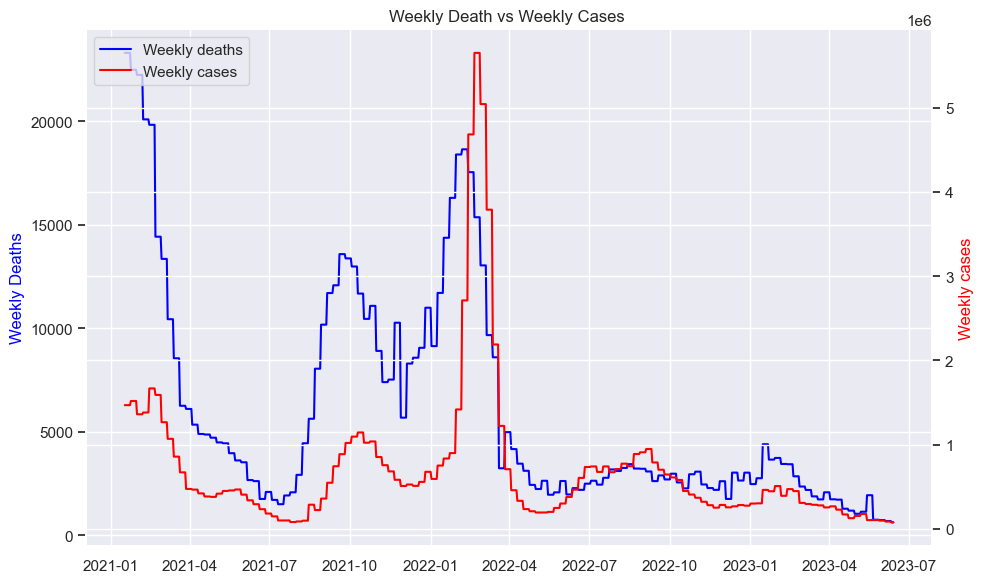

In [52]:
#timeseries with weekly death 
concatenated_dataframes['date'] = pd.to_datetime(concatenated_dataframes['date'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(concatenated_dataframes['date'], concatenated_dataframes['weekly_deaths'], label='Weekly deaths', color='blue')
ax1.set_ylabel('Weekly Deaths', color='blue')

ax2 = ax1.twinx()
ax2.plot(concatenated_dataframes['date'], concatenated_dataframes['weekly_cases'], label='Weekly cases', color='red')
ax2.set_ylabel('Weekly cases', color='red')

plt.title('Weekly Death vs Weekly Cases ')
plt.xlabel('Date')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
overall5 = pd.DataFrame(concatenated_dataframes[[ "weekly_deaths","weekly_cases","Daily hospital occupancy","total_vaccinations"]])
overall5.head()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,23312.0,1468482.0,120830,19218336.0
1,23312.0,1468482.0,120422,20110141.0
2,23312.0,1468482.0,119384,21463944.0
3,23312.0,1468482.0,117115,23079181.0
4,23312.0,1468482.0,114097,24726816.0


In [54]:
overall4.corr()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
weekly_deaths,1.000000,0.669922,0.754465,-0.548747
weekly_cases,0.669922,1.000000,0.376901,-0.092912
Daily hospital occupancy,0.754465,0.376901,1.000000,-0.326348
total_vaccinations,-0.548747,-0.092912,-0.326348,1.000000


<Axes: >

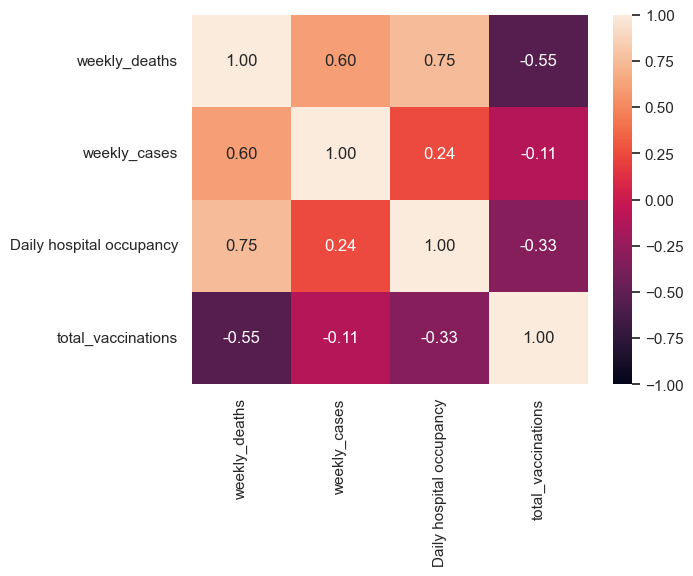

In [55]:
#correlation 
sb.heatmap(overall5.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

## Shift daily hospital occupancy 2 weeks up 

In [56]:
hospitalisation_data_2 = hospitalisation_data_2wk.drop(range(0,172 ), inplace=True)
hospitalisation_data_2 = hospitalisation_data_2wk.iloc[0:878]
hospitalisation_data_2.reset_index(drop=True, inplace=True)
hospitalisation_data_2.head()

C:\Users\leong\AppData\Local\Temp\ipykernel_28608\475119310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalisation_data_2 = hospitalisation_data_2wk.drop(range(0,172 ), inplace=True)


,Entity,Code,Day,Daily hospital occupancy
0,United States,USA,2021-01-03,125595
1,United States,USA,2021-01-04,127427
2,United States,USA,2021-01-05,128859
3,United States,USA,2021-01-06,129800
4,United States,USA,2021-01-07,128814


In [57]:
#CLEANED DATA FOR HOSPITALISATIONS
hospitalisations_data_2 = pd.DataFrame(hospitalisation_data_2wk[[ "Daily hospital occupancy"]])
hospitalisations_data_2.head()

,Daily hospital occupancy
172,125595
173,127427
174,128859
175,129800
176,128814


In [58]:
#concate with others 
concatenated_dataframes = pd.concat(
    [
        deaths_data.reset_index(drop=True),
        positivecases_data_0.reset_index(drop=True),
        hospitalisations_data_2.reset_index(drop=True),
        totalvaccination_data_0.reset_index(drop=True)
    ],
    axis=1
)
concatenated_dataframes.reset_index(drop=True, inplace=True)
concatenated_dataframes.head(10)

,date,location,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,2021-01-17,United States,23312.0,1589955.0,125595,19218336.0
1,2021-01-18,United States,23312.0,1589955.0,127427,20110141.0
2,2021-01-19,United States,23312.0,1589955.0,128859,21463944.0
3,2021-01-20,United States,23312.0,1589955.0,129800,23079181.0
4,2021-01-21,United States,23312.0,1589955.0,128814,24726816.0
5,2021-01-22,United States,23312.0,1589955.0,127888,26373687.0
6,2021-01-23,United States,23312.0,1589955.0,126420,27287063.0
7,2021-01-24,United States,22495.0,1265861.0,126533,27690932.0
8,2021-01-25,United States,22495.0,1265861.0,127641,29075771.0
9,2021-01-26,United States,22495.0,1265861.0,127090,30746637.0


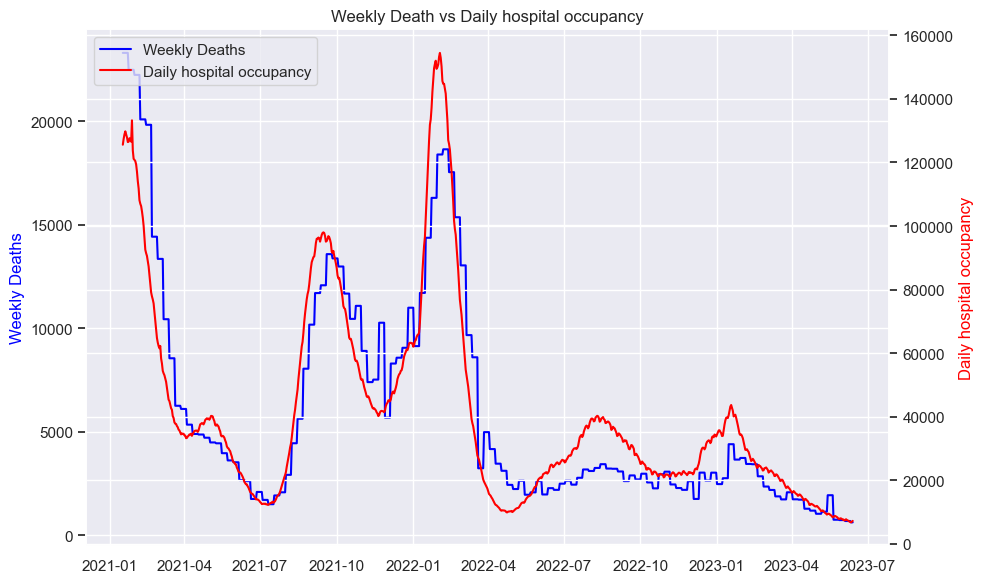

In [59]:
#time series with weekly death 
concatenated_dataframes['date'] = pd.to_datetime(concatenated_dataframes['date'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(concatenated_dataframes['date'], concatenated_dataframes['weekly_deaths'], label='Weekly Deaths', color='blue')
ax1.set_ylabel('Weekly Deaths', color='blue')

ax2 = ax1.twinx()
ax2.plot(concatenated_dataframes['date'], concatenated_dataframes['Daily hospital occupancy'], label='Daily hospital occupancy', color='red')
ax2.set_ylabel('Daily hospital occupancy', color='red')

plt.title('Weekly Death vs Daily hospital occupancy')
plt.xlabel('Date')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
overall2 = pd.DataFrame(concatenated_dataframes[[ "weekly_deaths","weekly_cases","Daily hospital occupancy","total_vaccinations"]])
overall2.head()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,23312.0,1589955.0,125595,19218336.0
1,23312.0,1589955.0,127427,20110141.0
2,23312.0,1589955.0,128859,21463944.0
3,23312.0,1589955.0,129800,23079181.0
4,23312.0,1589955.0,128814,24726816.0


In [61]:
overall2.corr()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
weekly_deaths,1.000000,0.532308,0.926297,-0.548747
weekly_cases,0.532308,1.000000,0.703190,-0.041242
Daily hospital occupancy,0.926297,0.703190,1.000000,-0.393286
total_vaccinations,-0.548747,-0.041242,-0.393286,1.000000


<Axes: >

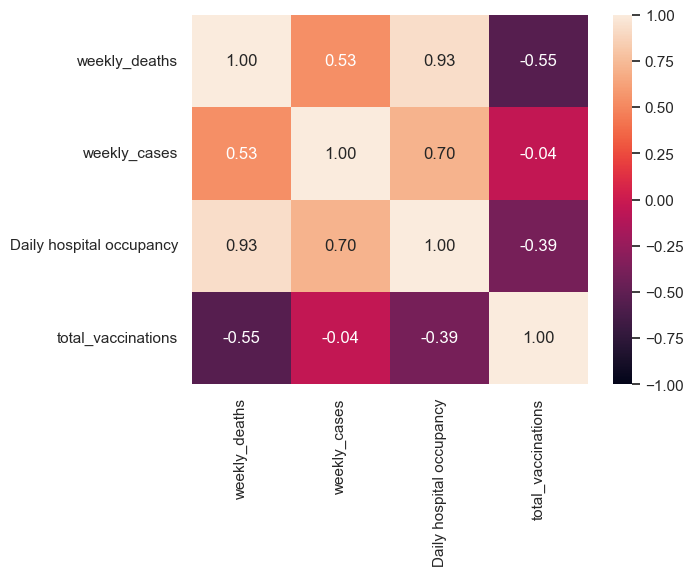

In [62]:
# correlation 
sb.heatmap(overall2.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

## shift daily hospital occupancy 3 weeks up 

In [63]:
hospitalisation_data_3 = hospitalisation_data_3wk.drop(range(0,165 ), inplace=True)
hospitalisation_data_3 = hospitalisation_data_3wk.iloc[0:878]
hospitalisation_data_3.reset_index(drop=True, inplace=True)
hospitalisation_data_3.head()

C:\Users\leong\AppData\Local\Temp\ipykernel_28608\3397104305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalisation_data_3 = hospitalisation_data_3wk.drop(range(0,165 ), inplace=True)


,Entity,Code,Day,Daily hospital occupancy
0,United States,USA,2020-12-27,118988
1,United States,USA,2020-12-28,121425
2,United States,USA,2020-12-29,122665
3,United States,USA,2020-12-30,123922
4,United States,USA,2020-12-31,123347


In [64]:
#CLEANED DATA FOR HOSPITALISATIONS
hospitalisations_data_3 = pd.DataFrame(hospitalisation_data_3wk[[ "Daily hospital occupancy"]])
hospitalisations_data_3.head()

,Daily hospital occupancy
165,118988
166,121425
167,122665
168,123922
169,123347


In [65]:
#concate with others 
concatenated_dataframes = pd.concat(
    [
        deaths_data.reset_index(drop=True),
        positivecases_data_0.reset_index(drop=True),
        hospitalisations_data_3.reset_index(drop=True),
        totalvaccination_data_0.reset_index(drop=True)
    ],
    axis=1
)
concatenated_dataframes.reset_index(drop=True, inplace=True)
concatenated_dataframes.head(10)

,date,location,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,2021-01-17,United States,23312.0,1589955.0,118988,19218336.0
1,2021-01-18,United States,23312.0,1589955.0,121425,20110141.0
2,2021-01-19,United States,23312.0,1589955.0,122665,21463944.0
3,2021-01-20,United States,23312.0,1589955.0,123922,23079181.0
4,2021-01-21,United States,23312.0,1589955.0,123347,24726816.0
5,2021-01-22,United States,23312.0,1589955.0,121053,26373687.0
6,2021-01-23,United States,23312.0,1589955.0,122668,27287063.0
7,2021-01-24,United States,22495.0,1265861.0,125595,27690932.0
8,2021-01-25,United States,22495.0,1265861.0,127427,29075771.0
9,2021-01-26,United States,22495.0,1265861.0,128859,30746637.0


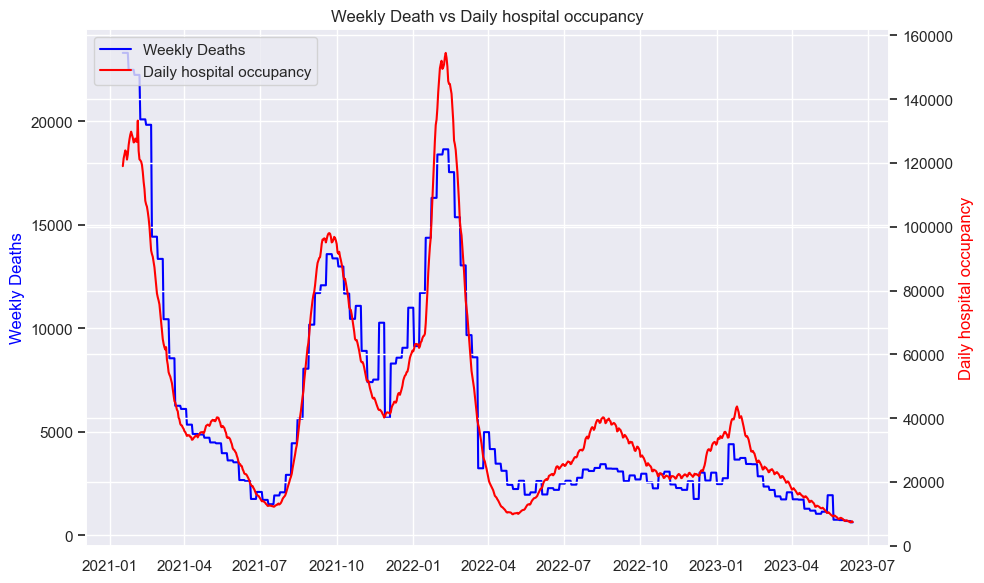

In [66]:
# timeseries with weekly death 
concatenated_dataframes['date'] = pd.to_datetime(concatenated_dataframes['date'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(concatenated_dataframes['date'], concatenated_dataframes['weekly_deaths'], label='Weekly Deaths', color='blue')
ax1.set_ylabel('Weekly Deaths', color='blue')

ax2 = ax1.twinx()
ax2.plot(concatenated_dataframes['date'], concatenated_dataframes['Daily hospital occupancy'], label='Daily hospital occupancy', color='red')
ax2.set_ylabel('Daily hospital occupancy', color='red')

plt.title('Weekly Death vs Daily hospital occupancy')
plt.xlabel('Date')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
overall3 = pd.DataFrame(concatenated_dataframes[[ "weekly_deaths","weekly_cases","Daily hospital occupancy","total_vaccinations"]])
overall3.head()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,23312.0,1589955.0,118988,19218336.0
1,23312.0,1589955.0,121425,20110141.0
2,23312.0,1589955.0,122665,21463944.0
3,23312.0,1589955.0,123922,23079181.0
4,23312.0,1589955.0,123347,24726816.0


In [68]:
overall3.corr()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
weekly_deaths,1.000000,0.532308,0.953807,-0.548747
weekly_cases,0.532308,1.000000,0.559280,-0.041242
Daily hospital occupancy,0.953807,0.559280,1.000000,-0.421677
total_vaccinations,-0.548747,-0.041242,-0.421677,1.000000


<Axes: >

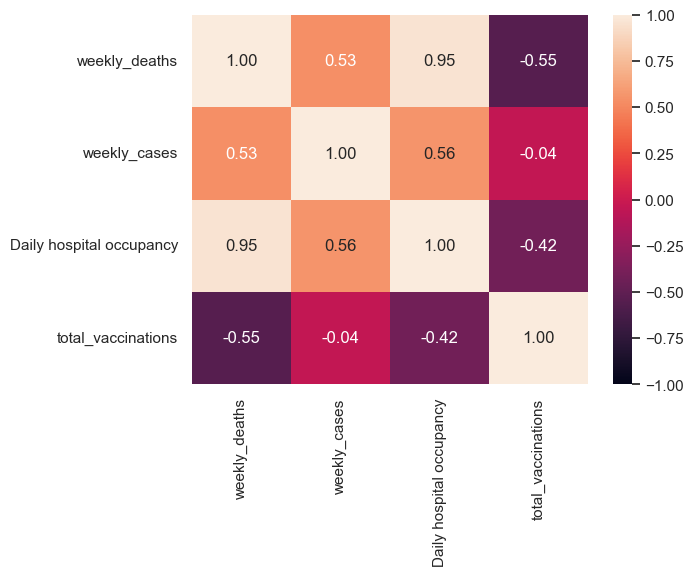

In [69]:
#correlation
sb.heatmap(overall3.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

## shift daily hospital occupancy 4 weeks up 

In [70]:
hospitalisation_data_4 = hospitalisation_data_4wk.drop(range(0,158 ), inplace=True)
hospitalisation_data_4 = hospitalisation_data_4wk.iloc[0:878]
hospitalisation_data_4.reset_index(drop=True, inplace=True)
hospitalisation_data_4.head()

C:\Users\leong\AppData\Local\Temp\ipykernel_28608\2083089734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalisation_data_4 = hospitalisation_data_4wk.drop(range(0,158 ), inplace=True)


,Entity,Code,Day,Daily hospital occupancy
0,United States,USA,2020-12-20,112401
1,United States,USA,2020-12-21,114649
2,United States,USA,2020-12-22,117528
3,United States,USA,2020-12-23,118106
4,United States,USA,2020-12-24,116274


In [71]:
#CLEANED DATA FOR HOSPITALISATIONS
hospitalisations_data_4 = pd.DataFrame(hospitalisation_data_4wk[["Daily hospital occupancy"]])
hospitalisations_data_4.head()

,Daily hospital occupancy
158,112401
159,114649
160,117528
161,118106
162,116274


In [72]:
#concated with others 
concatenated_dataframes = pd.concat(
    [
        deaths_data.reset_index(drop=True),
        positivecases_data_0.reset_index(drop=True),
        hospitalisations_data_4.reset_index(drop=True),
        totalvaccination_data_0.reset_index(drop=True)
    ],
    axis=1
)
concatenated_dataframes.reset_index(drop=True, inplace=True)
concatenated_dataframes.head(10)

,date,location,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,2021-01-17,United States,23312.0,1589955.0,112401,19218336.0
1,2021-01-18,United States,23312.0,1589955.0,114649,20110141.0
2,2021-01-19,United States,23312.0,1589955.0,117528,21463944.0
3,2021-01-20,United States,23312.0,1589955.0,118106,23079181.0
4,2021-01-21,United States,23312.0,1589955.0,116274,24726816.0
5,2021-01-22,United States,23312.0,1589955.0,113496,26373687.0
6,2021-01-23,United States,23312.0,1589955.0,115521,27287063.0
7,2021-01-24,United States,22495.0,1265861.0,118988,27690932.0
8,2021-01-25,United States,22495.0,1265861.0,121425,29075771.0
9,2021-01-26,United States,22495.0,1265861.0,122665,30746637.0


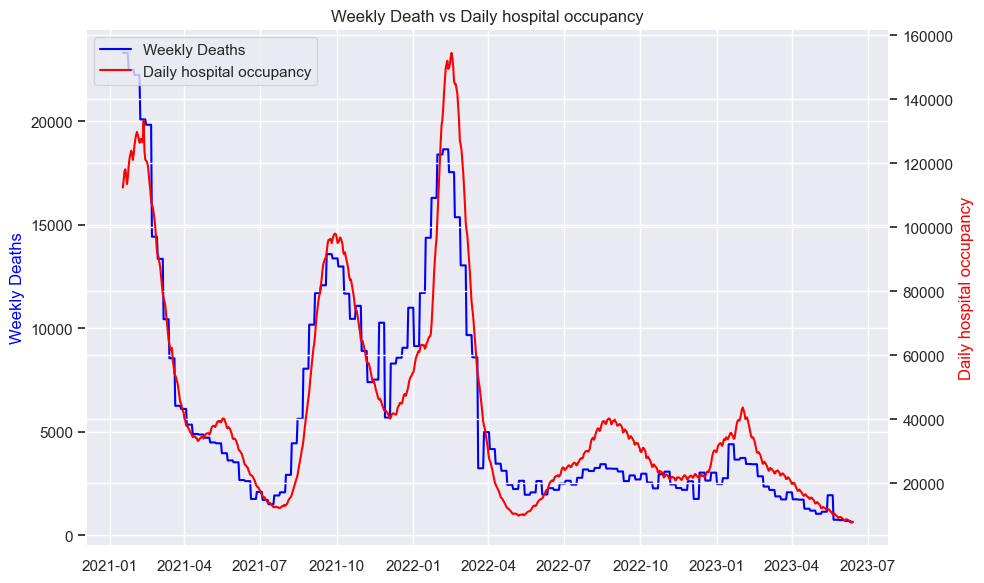

In [73]:
#timeseries with weekly death 
concatenated_dataframes['date'] = pd.to_datetime(concatenated_dataframes['date'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(concatenated_dataframes['date'], concatenated_dataframes['weekly_deaths'], label='Weekly Deaths', color='blue')
ax1.set_ylabel('Weekly Deaths', color='blue')

ax2 = ax1.twinx()
ax2.plot(concatenated_dataframes['date'], concatenated_dataframes['Daily hospital occupancy'], label='Daily hospital occupancy', color='red')
ax2.set_ylabel('Daily hospital occupancy', color='red')

plt.title('Weekly Death vs Daily hospital occupancy')
plt.xlabel('Date')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

In [74]:
overall4 = pd.DataFrame(concatenated_dataframes[[ "weekly_deaths","weekly_cases","Daily hospital occupancy","total_vaccinations"]])
overall4.head()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,23312.0,1589955.0,112401,19218336.0
1,23312.0,1589955.0,114649,20110141.0
2,23312.0,1589955.0,117528,21463944.0
3,23312.0,1589955.0,118106,23079181.0
4,23312.0,1589955.0,116274,24726816.0


In [75]:
overall4.corr()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
weekly_deaths,1.000000,0.532308,0.940550,-0.548747
weekly_cases,0.532308,1.000000,0.414426,-0.041242
Daily hospital occupancy,0.940550,0.414426,1.000000,-0.445567
total_vaccinations,-0.548747,-0.041242,-0.445567,1.000000


<Axes: >

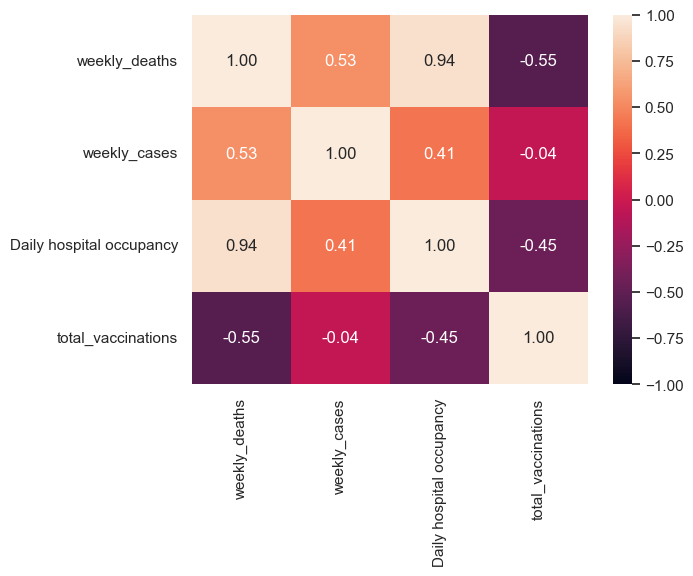

In [76]:
#correlation 
sb.heatmap(overall4.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

## shift daily hospital occupancy 5 weeks up 

In [77]:
hospitalisation_data_5 = hospitalisation_data_5wk.drop(range(0,151 ), inplace=True)
hospitalisation_data_5 = hospitalisation_data_5wk.iloc[0:878]
hospitalisation_data_5.reset_index(drop=True, inplace=True)
hospitalisation_data_5.head()

C:\Users\leong\AppData\Local\Temp\ipykernel_28608\401259636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hospitalisation_data_5 = hospitalisation_data_5wk.drop(range(0,151 ), inplace=True)


,Entity,Code,Day,Daily hospital occupancy
0,United States,USA,2020-12-13,107402
1,United States,USA,2020-12-14,109689
2,United States,USA,2020-12-15,110996
3,United States,USA,2020-12-16,111997
4,United States,USA,2020-12-17,112445


In [78]:
#CLEANED DATA FOR HOSPITALISATIONS
hospitalisations_data_5 = pd.DataFrame(hospitalisation_data_5wk[[ "Daily hospital occupancy"]])
hospitalisations_data_5.head()

,Daily hospital occupancy
151,107402
152,109689
153,110996
154,111997
155,112445


In [79]:
#concated with others 
concatenated_dataframes = pd.concat(
    [
        deaths_data.reset_index(drop=True),
        positivecases_data_0.reset_index(drop=True),
        hospitalisations_data_5.reset_index(drop=True),
        totalvaccination_data_0.reset_index(drop=True)
    ],
    axis=1
)
concatenated_dataframes.reset_index(drop=True, inplace=True)
concatenated_dataframes.head(10)

,date,location,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,2021-01-17,United States,23312.0,1589955.0,107402,19218336.0
1,2021-01-18,United States,23312.0,1589955.0,109689,20110141.0
2,2021-01-19,United States,23312.0,1589955.0,110996,21463944.0
3,2021-01-20,United States,23312.0,1589955.0,111997,23079181.0
4,2021-01-21,United States,23312.0,1589955.0,112445,24726816.0
5,2021-01-22,United States,23312.0,1589955.0,112114,26373687.0
6,2021-01-23,United States,23312.0,1589955.0,111037,27287063.0
7,2021-01-24,United States,22495.0,1265861.0,112401,27690932.0
8,2021-01-25,United States,22495.0,1265861.0,114649,29075771.0
9,2021-01-26,United States,22495.0,1265861.0,117528,30746637.0


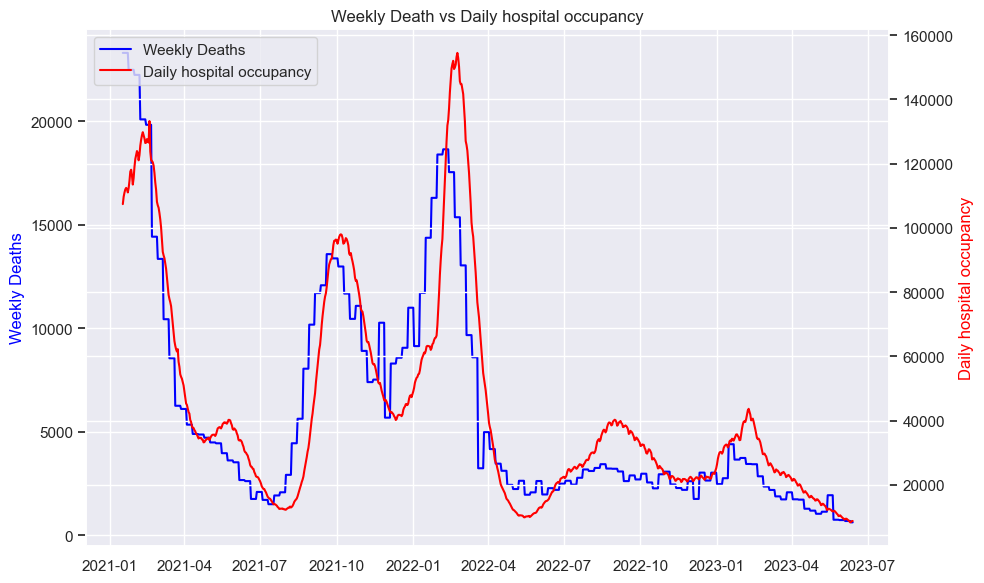

In [80]:
#time series with weekly death 
concatenated_dataframes['date'] = pd.to_datetime(concatenated_dataframes['date'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(concatenated_dataframes['date'], concatenated_dataframes['weekly_deaths'], label='Weekly Deaths', color='blue')
ax1.set_ylabel('Weekly Deaths', color='blue')

ax2 = ax1.twinx()
ax2.plot(concatenated_dataframes['date'], concatenated_dataframes['Daily hospital occupancy'], label='Daily hospital occupancy', color='red')
ax2.set_ylabel('Daily hospital occupancy', color='red')

plt.title('Weekly Death vs Daily hospital occupancy')
plt.xlabel('Date')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

In [81]:
overall5 = pd.DataFrame(concatenated_dataframes[[ "weekly_deaths","weekly_cases","Daily hospital occupancy","total_vaccinations"]])
overall5.head()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,23312.0,1589955.0,107402,19218336.0
1,23312.0,1589955.0,109689,20110141.0
2,23312.0,1589955.0,110996,21463944.0
3,23312.0,1589955.0,111997,23079181.0
4,23312.0,1589955.0,112445,24726816.0


In [82]:
overall5.corr()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
weekly_deaths,1.000000,0.532308,0.891879,-0.548747
weekly_cases,0.532308,1.000000,0.289447,-0.041242
Daily hospital occupancy,0.891879,0.289447,1.000000,-0.465675
total_vaccinations,-0.548747,-0.041242,-0.465675,1.000000


<Axes: >

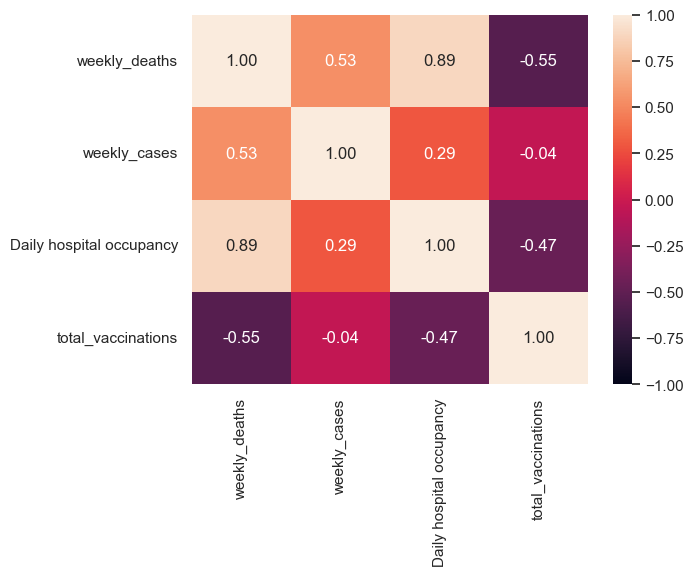

In [83]:
#correlation 
sb.heatmap(overall5.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

## shift vaccinations 3 weeks up 

In [84]:
#CLEANED FOR VACCINATIONS 
totalvaccination_data_3 = totalvaccination_data_3wk.drop(range(0, 14), inplace=True)
totalvaccination_data_3 = totalvaccination_data_3wk.iloc[0:878]
totalvaccination_data_3.reset_index(drop=True, inplace=True)
totalvaccination_data_3.head(100)

,total_vaccinations
0,3114027
1,3711556
2,4440692
3,5289609
4,5716312
...,...
95,177076502
96,180723033
97,183030847
98,183796134


In [85]:
#concate twith the other factors
concatenated_dataframes = pd.concat(
    [
        deaths_data.reset_index(drop=True),
        positivecases_data_0.reset_index(drop=True),
        hospitalisations_data_0.reset_index(drop=True),
        totalvaccination_data_3.reset_index(drop=True)
    ],
    axis=1
)
concatenated_dataframes.reset_index(drop=True, inplace=True)
concatenated_dataframes.head(10)

,date,location,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,2021-01-17,United States,23312.0,1589955.0,120830,3114027.0
1,2021-01-18,United States,23312.0,1589955.0,120422,3711556.0
2,2021-01-19,United States,23312.0,1589955.0,119384,4440692.0
3,2021-01-20,United States,23312.0,1589955.0,117115,5289609.0
4,2021-01-21,United States,23312.0,1589955.0,114097,5716312.0
5,2021-01-22,United States,23312.0,1589955.0,111831,5854174.0
6,2021-01-23,United States,23312.0,1589955.0,108122,6123124.0
7,2021-01-24,United States,22495.0,1265861.0,107004,6264523.0
8,2021-01-25,United States,22495.0,1265861.0,106268,6930229.0
9,2021-01-26,United States,22495.0,1265861.0,104627,7771008.0


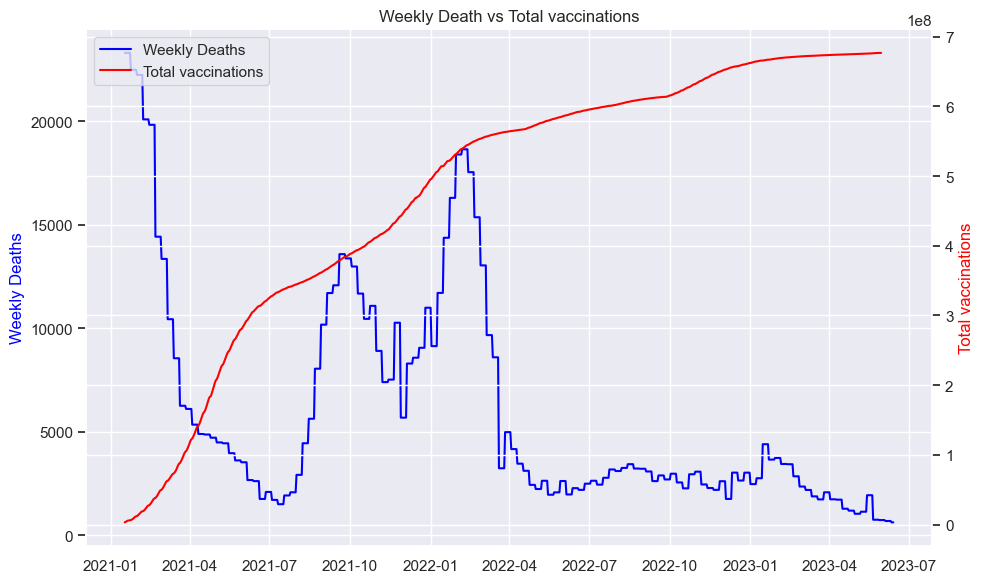

In [86]:
# time series with weekly death
concatenated_dataframes['date'] = pd.to_datetime(concatenated_dataframes['date'])

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(concatenated_dataframes['date'], concatenated_dataframes['weekly_deaths'], label='Weekly Deaths', color='blue')
ax1.set_ylabel('Weekly Deaths', color='blue')

ax2 = ax1.twinx()
ax2.plot(concatenated_dataframes['date'], concatenated_dataframes['total_vaccinations'], label='Total vaccinations', color='red')
ax2.set_ylabel('Total vaccinations', color='red')

plt.title('Weekly Death vs Total vaccinations')
plt.xlabel('Date')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels, loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
overall3 = pd.DataFrame(concatenated_dataframes[[ "weekly_deaths","weekly_cases","Daily hospital occupancy","total_vaccinations"]])
overall3.head()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
0,23312.0,1589955.0,120830,3114027.0
1,23312.0,1589955.0,120422,3711556.0
2,23312.0,1589955.0,119384,4440692.0
3,23312.0,1589955.0,117115,5289609.0
4,23312.0,1589955.0,114097,5716312.0


In [88]:
overall3.corr()

,weekly_deaths,weekly_cases,Daily hospital occupancy,total_vaccinations
weekly_deaths,1.000000,0.532308,0.754465,-0.550552
weekly_cases,0.532308,1.000000,0.842447,-0.054750
Daily hospital occupancy,0.754465,0.842447,1.000000,-0.343773
total_vaccinations,-0.550552,-0.054750,-0.343773,1.000000


<Axes: >

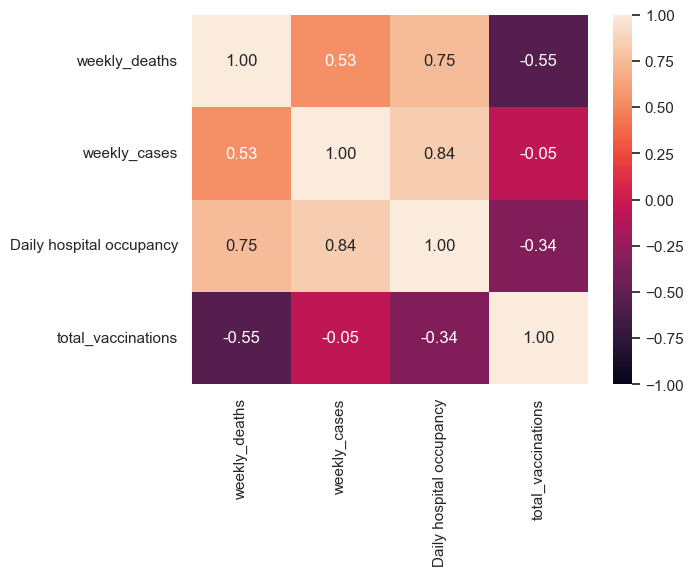

In [89]:
#correlation 
sb.heatmap(overall3.corr(),vmin=-1,vmax=1,annot=True,fmt=".2f")

## Linear Regression 

## Vacination against death 

In [100]:
deaths_data = overall5['weekly_deaths']
deaths_data.head()

0    23312.0
1    23312.0
2    23312.0
3    23312.0
4    23312.0
Name: weekly_deaths, dtype: float64

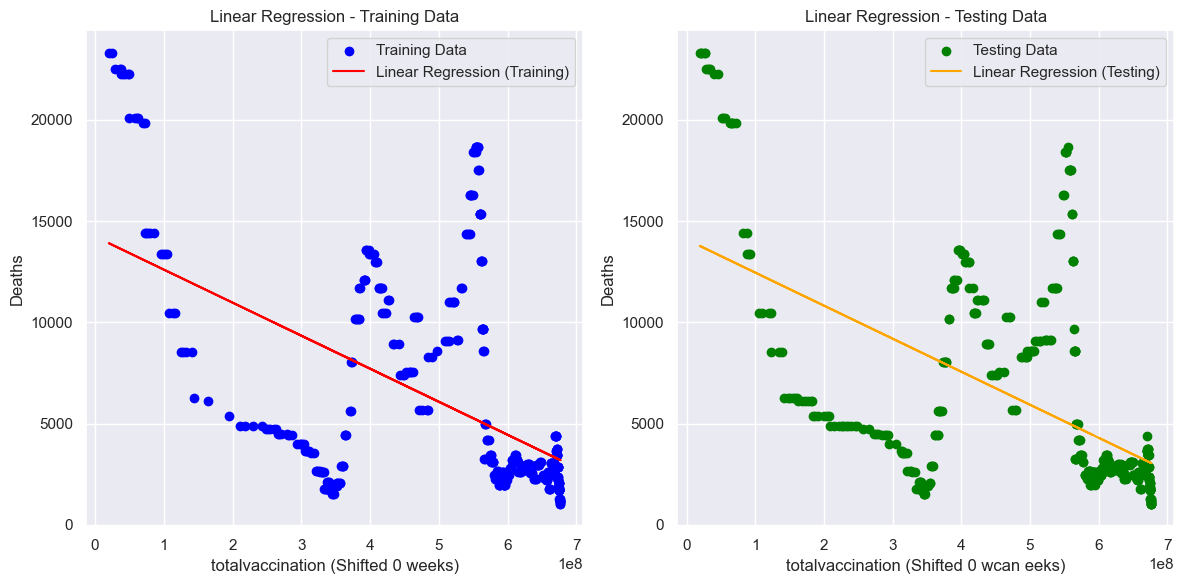

In [101]:
#Vaccination Week 0 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming X1 and y are your input and target variables
X1 = np.array(totalvaccination_data_0)
y = np.array(deaths_data)

# Ensure X1 and y have the same number of samples
min_samples = min(len(X1), len(y))
X1 = X1[:min_samples]
y = y[:min_samples]

# Filter out NaN values
valid_indices = ~np.isnan(X1.flatten()) & ~np.isnan(y.flatten())
X1 = X1[valid_indices]
y = y[valid_indices]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.5, random_state=42)

# Perform linear regression on training data
model_train = LinearRegression()
model_train.fit(X_train.reshape(-1, 1), y_train)  # Reshape X_train to 2D format as required by scikit-learn

# Perform linear regression on testing data
model_test = LinearRegression()
model_test.fit(X_test.reshape(-1, 1), y_test)  # Reshape X_test to 2D format as required by scikit-learn

# Plot training data points and linear regression line for training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model_train.predict(X_train.reshape(-1, 1)), color='red', label='Linear Regression (Training)')
plt.xlabel('totalvaccination (Shifted 0 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Training Data')
plt.legend()

# Plot testing data points and linear regression line for testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, model_test.predict(X_test.reshape(-1, 1)), color='orange', label='Linear Regression (Testing)')
plt.xlabel('totalvaccination (Shifted 0 wcan eeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Testing Data')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

In [102]:

from sklearn.metrics import mean_squared_error
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', model_train.intercept_)
print('Coefficients of Regression \t: a = ', model_train.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = model_train.predict(X_train)
y_test_pred = model_test.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_train.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_test.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


Intercept of Regression 	: b =  14241.579137662808
Coefficients of Regression 	: a =  [-1.63249081e-05]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.28352948289089086
Mean Squared Error (MSE) 	: 21147742.169446204

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.31998190461917486
Mean Squared Error (MSE) 	: 18998411.870790154



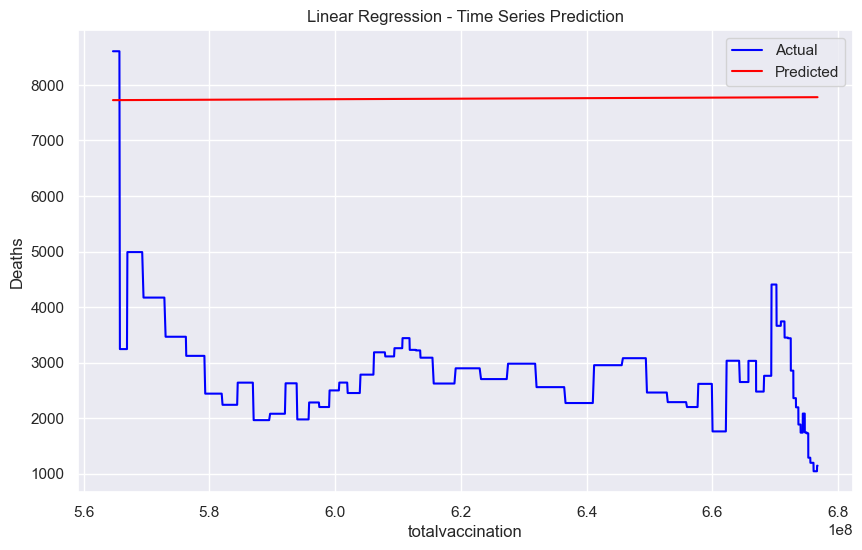

In [105]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Assuming X1 and y are your input and target variables
X1 = np.array(totalvaccination_data_0)
y = np.array(deaths_data)

# Ensure X1 and y have the same number of samples
min_samples = min(len(X1), len(y))
X1 = X1[:min_samples]
y = y[:min_samples]

# Filter out NaN values
valid_indices = ~np.isnan(X1.flatten()) & ~np.isnan(y.flatten())
X1 = X1[valid_indices]
y = y[valid_indices]

# Split data into train and test sets
split_ratio = 0.5 
split_index = int(len(X1) * split_ratio)

X_train = X1[:split_index]
y_train = y[:split_index]

X_test = X1[split_index:]
y_test = y[split_index:]

# Perform linear regression on training data
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), np.log(y_train + 1))  # Adding 1 to y_train to avoid log(0)

# Predict on test data
y_pred_log = model.predict(X_test.reshape(-1, 1))

# Transform predicted values back to original scale
y_pred = np.exp(y_pred_log) - 1

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, label='Actual', color='blue')
plt.plot(X_test, y_pred, label='Predicted', color='red')
plt.xlabel('totalvaccination')
plt.ylabel('Deaths')
plt.title('Linear Regression - Time Series Prediction')
plt.legend()
plt.show()


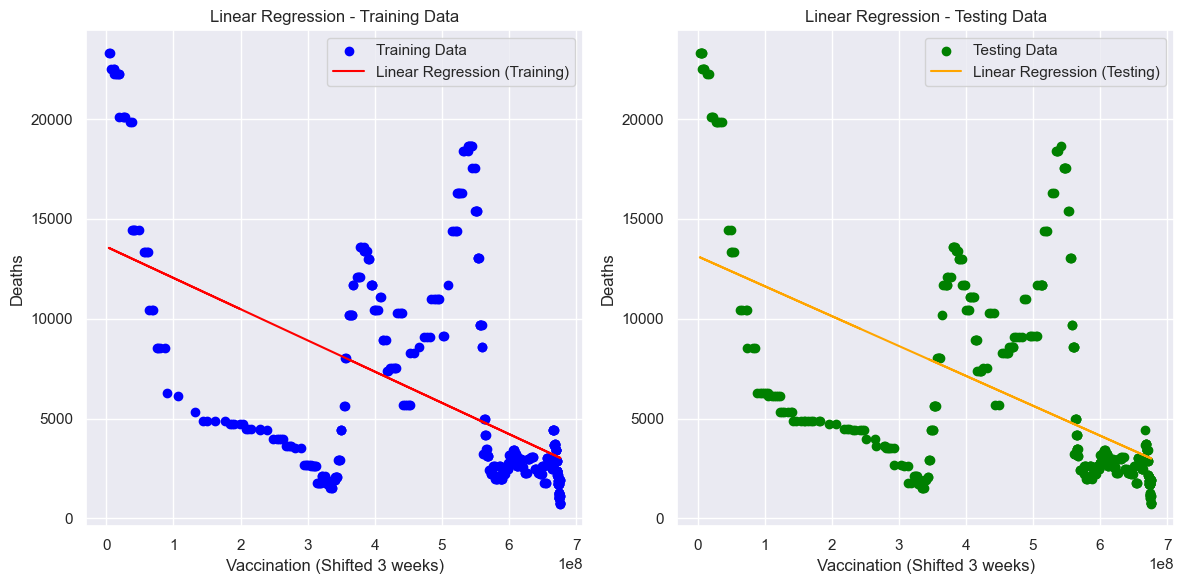

In [106]:
#Vaccination Shift 3 weeks 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming X1 and y are your input and target variables
X1 = np.array(totalvaccination_data_3)
y = np.array(deaths_data)

# Ensure X1 and y have the same number of samples
min_samples = min(len(X1), len(y))
X1 = X1[:min_samples]
y = y[:min_samples]

# Filter out NaN values
valid_indices = ~np.isnan(X1.flatten()) & ~np.isnan(y.flatten())
X1 = X1[valid_indices]
y = y[valid_indices]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.5, random_state=42)

# Perform linear regression on training data
model_train = LinearRegression()
model_train.fit(X_train.reshape(-1, 1), y_train)  # Reshape X_train to 2D format as required by scikit-learn

# Perform linear regression on testing data
model_test = LinearRegression()
model_test.fit(X_test.reshape(-1, 1), y_test)  # Reshape X_test to 2D format as required by scikit-learn

# Plot training data points and linear regression line for training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model_train.predict(X_train.reshape(-1, 1)), color='red', label='Linear Regression (Training)')
plt.xlabel('Vaccination (Shifted 3 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Training Data')
plt.legend()

# Plot testing data points and linear regression line for testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, model_test.predict(X_test.reshape(-1, 1)), color='orange', label='Linear Regression (Testing)')
plt.xlabel('Vaccination (Shifted 3 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Testing Data')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


In [107]:

from sklearn.metrics import mean_squared_error
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', model_train.intercept_)
print('Coefficients of Regression \t: a = ', model_train.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = model_train.predict(X_train)
y_test_pred = model_test.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_train.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_test.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


Intercept of Regression 	: b =  13607.486794049872
Coefficients of Regression 	: a =  [-1.56318358e-05]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.29723860120330325
Mean Squared Error (MSE) 	: 20574416.913688675

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3097797013945772
Mean Squared Error (MSE) 	: 19282707.134753156



## Hospitalisation Vs Death

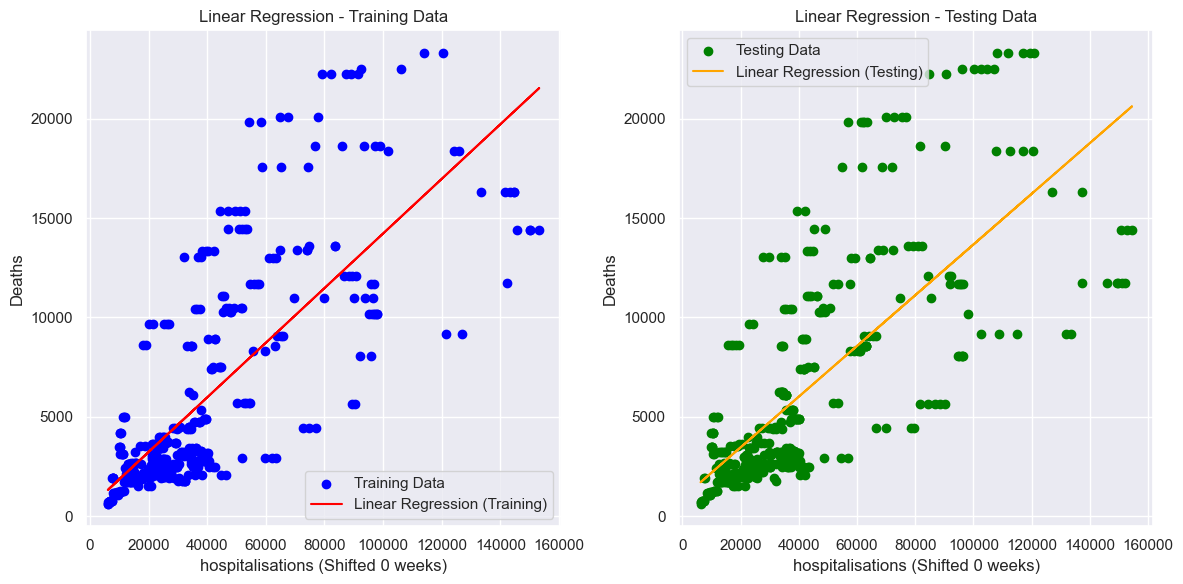

In [108]:
## Hospitalisation 0 WEEK 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming X1 and y are your input and target variables
X1 = np.array(hospitalisations_data_0)
y = np.array(deaths_data)

# Ensure X1 and y have the same number of samples
min_samples = min(len(X1), len(y))
X1 = X1[:min_samples]
y = y[:min_samples]

# Filter out NaN values
valid_indices = ~np.isnan(X1.flatten()) & ~np.isnan(y.flatten())
X1 = X1[valid_indices]
y = y[valid_indices]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.5, random_state=42)

# Perform linear regression on training data
model_train = LinearRegression()
model_train.fit(X_train.reshape(-1, 1), y_train)  # Reshape X_train to 2D format as required by scikit-learn

# Perform linear regression on testing data
model_test = LinearRegression()
model_test.fit(X_test.reshape(-1, 1), y_test)  # Reshape X_test to 2D format as required by scikit-learn

# Plot training data points and linear regression line for training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model_train.predict(X_train.reshape(-1, 1)), color='red', label='Linear Regression (Training)')
plt.xlabel('hospitalisations (Shifted 0 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Training Data')
plt.legend()

# Plot testing data points and linear regression line for testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, model_test.predict(X_test.reshape(-1, 1)), color='orange', label='Linear Regression (Testing)')
plt.xlabel('hospitalisations (Shifted 0 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Testing Data')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

In [109]:
from sklearn.metrics import mean_squared_error

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', model_train.intercept_)
print('Coefficients of Regression \t: a = ', model_train.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = model_train.predict(X_train)
y_test_pred = model_test.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_train.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_test.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


Intercept of Regression 	: b =  481.26380006471845
Coefficients of Regression 	: a =  [0.13745789]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5902135271531594
Mean Squared Error (MSE) 	: 11475162.689084228

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5496671754962257
Mean Squared Error (MSE) 	: 13120177.862321153



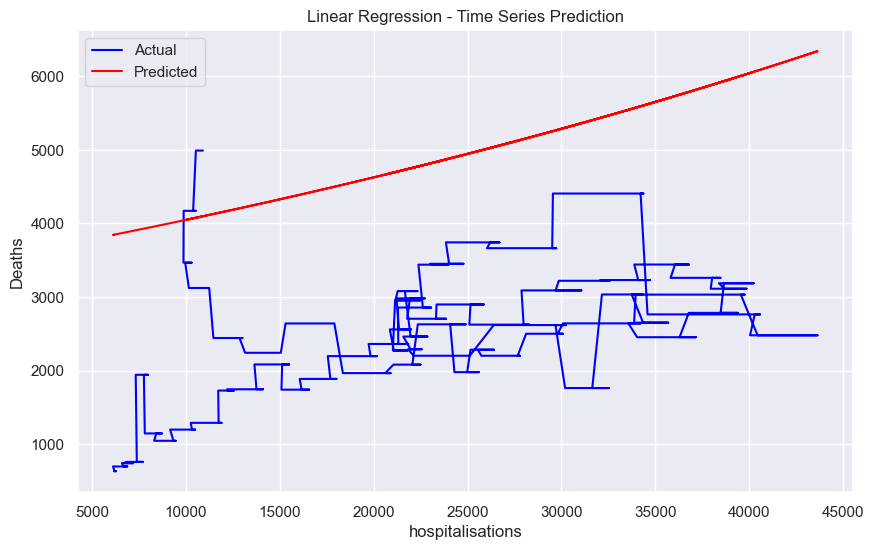

In [110]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Assuming X1 and y are your input and target variables
X1 = np.array(hospitalisations_data_0)
y = np.array(deaths_data)

# Ensure X1 and y have the same number of samples
min_samples = min(len(X1), len(y))
X1 = X1[:min_samples]
y = y[:min_samples]

# Filter out NaN values
valid_indices = ~np.isnan(X1.flatten()) & ~np.isnan(y.flatten())
X1 = X1[valid_indices]
y = y[valid_indices]

# Split data into train and test sets
split_ratio = 0.5  
split_index = int(len(X1) * split_ratio)

X_train = X1[:split_index]
y_train = y[:split_index]

X_test = X1[split_index:]
y_test = y[split_index:]

# Perform linear regression on training data
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), np.log(y_train + 1))  # Adding 1 to y_train to avoid log(0)

# Predict on test data
y_pred_log = model.predict(X_test.reshape(-1, 1))

# Transform predicted values back to original scale
y_pred = np.exp(y_pred_log) - 1

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, label='Actual', color='blue')
plt.plot(X_test, y_pred, label='Predicted', color='red')
plt.xlabel('hospitalisations')
plt.ylabel('Deaths')
plt.title('Linear Regression - Time Series Prediction')
plt.legend()
plt.show()

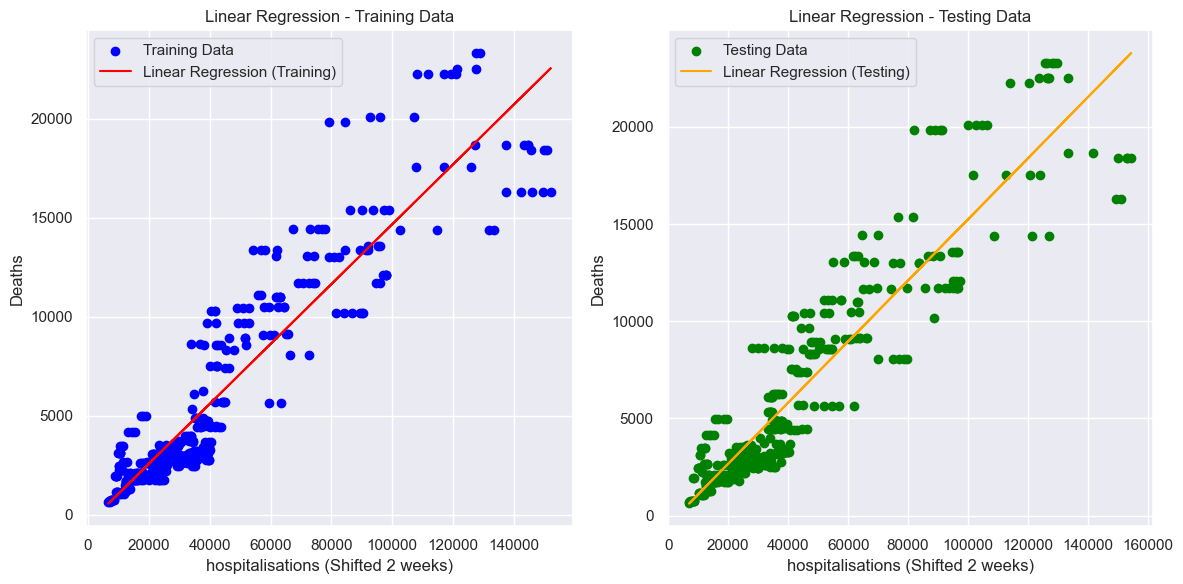

In [111]:
# Hospitalisation shift 2 week 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming X1 and y are your input and target variables
X1 = np.array(hospitalisations_data_2)
y = np.array(deaths_data)

# Ensure X1 and y have the same number of samples
min_samples = min(len(X1), len(y))
X1 = X1[:min_samples]
y = y[:min_samples]

# Filter out NaN values
valid_indices = ~np.isnan(X1.flatten()) & ~np.isnan(y.flatten())
X1 = X1[valid_indices]
y = y[valid_indices]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.5, random_state=42)

# Perform linear regression on training data
model_train = LinearRegression()
model_train.fit(X_train.reshape(-1, 1), y_train)  # Reshape X_train to 2D format as required by scikit-learn

# Perform linear regression on testing data
model_test = LinearRegression()
model_test.fit(X_test.reshape(-1, 1), y_test)  # Reshape X_test to 2D format as required by scikit-learn

# Plot training data points and linear regression line for training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model_train.predict(X_train.reshape(-1, 1)), color='red', label='Linear Regression (Training)')
plt.xlabel('hospitalisations (Shifted 2 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Training Data')
plt.legend()

# Plot testing data points and linear regression line for testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, model_test.predict(X_test.reshape(-1, 1)), color='orange', label='Linear Regression (Testing)')
plt.xlabel('hospitalisations (Shifted 2 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Testing Data')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

In [112]:

from sklearn.metrics import mean_squared_error
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', model_train.intercept_)
print('Coefficients of Regression \t: a = ', model_train.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = model_train.predict(X_train)
y_test_pred = model_test.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_train.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_test.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


Intercept of Regression 	: b =  -458.588054549532
Coefficients of Regression 	: a =  [0.15121914]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8599767589545169
Mean Squared Error (MSE) 	: 3921040.7803049185

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8573987654451048
Mean Squared Error (MSE) 	: 4154601.794369356



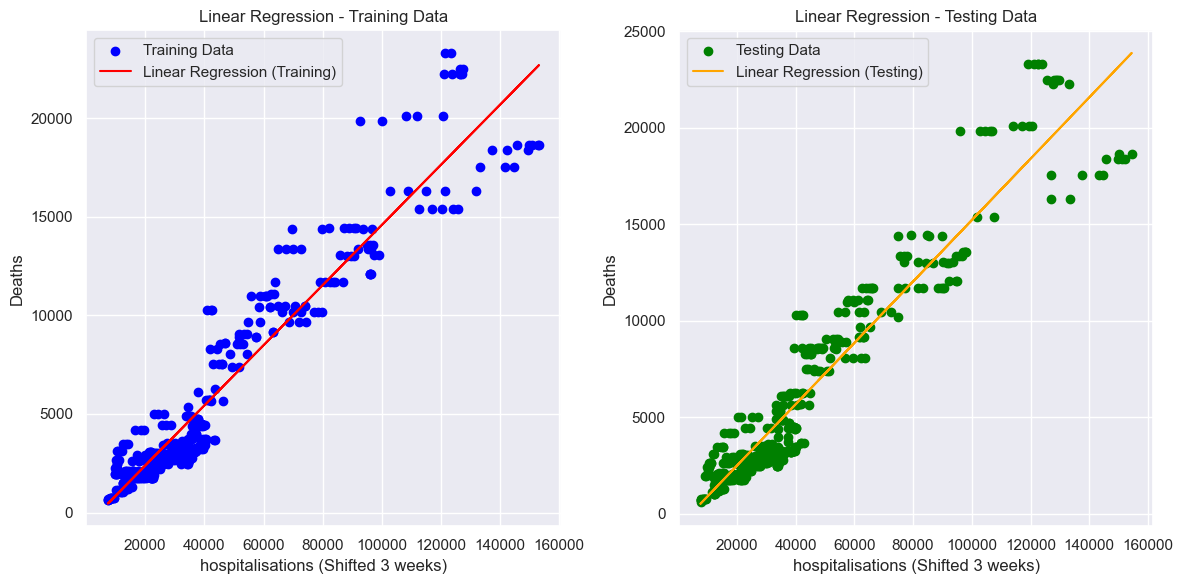

In [113]:
#Hospitalisation shift 3 weeks 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming X1 and y are your input and target variables
X1 = np.array(hospitalisations_data_3)
y = np.array(deaths_data)

# Ensure X1 and y have the same number of samples
min_samples = min(len(X1), len(y))
X1 = X1[:min_samples]
y = y[:min_samples]

# Filter out NaN values
valid_indices = ~np.isnan(X1.flatten()) & ~np.isnan(y.flatten())
X1 = X1[valid_indices]
y = y[valid_indices]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.5, random_state=42)

# Perform linear regression on training data
model_train = LinearRegression()
model_train.fit(X_train.reshape(-1, 1), y_train)  # Reshape X_train to 2D format as required by scikit-learn

# Perform linear regression on testing data
model_test = LinearRegression()
model_test.fit(X_test.reshape(-1, 1), y_test)  # Reshape X_test to 2D format as required by scikit-learn

# Plot training data points and linear regression line for training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model_train.predict(X_train.reshape(-1, 1)), color='red', label='Linear Regression (Training)')
plt.xlabel('hospitalisations (Shifted 3 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Training Data')
plt.legend()

# Plot testing data points and linear regression line for testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, model_test.predict(X_test.reshape(-1, 1)), color='orange', label='Linear Regression (Testing)')
plt.xlabel('hospitalisations (Shifted 3 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Testing Data')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

In [114]:

from sklearn.metrics import mean_squared_error
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', model_train.intercept_)
print('Coefficients of Regression \t: a = ', model_train.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = model_train.predict(X_train)
y_test_pred = model_test.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_train.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_test.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


Intercept of Regression 	: b =  -663.6842202319649
Coefficients of Regression 	: a =  [0.15246572]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9130023758878496
Mean Squared Error (MSE) 	: 2436175.8047192697

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9083704507379744
Mean Squared Error (MSE) 	: 2669572.188273871



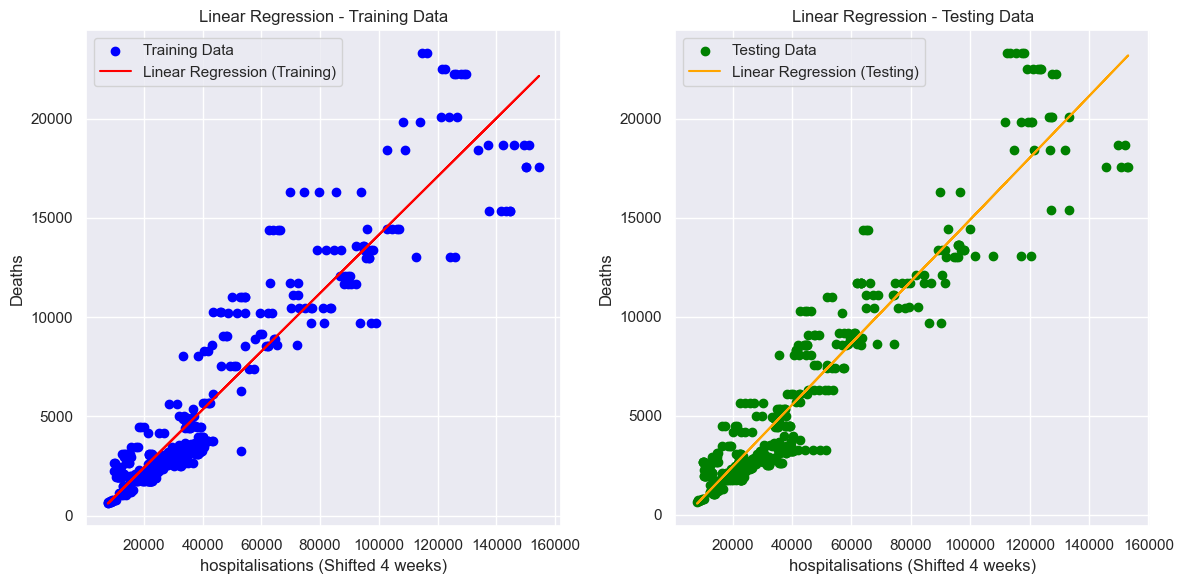

In [115]:
## Hospitalisation shift 4 week 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming X1 and y are your input and target variables
X1 = np.array(hospitalisations_data_4)
y = np.array(deaths_data)

# Ensure X1 and y have the same number of samples
min_samples = min(len(X1), len(y))
X1 = X1[:min_samples]
y = y[:min_samples]

# Filter out NaN values
valid_indices = ~np.isnan(X1.flatten()) & ~np.isnan(y.flatten())
X1 = X1[valid_indices]
y = y[valid_indices]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.5, random_state=42)

# Perform linear regression on training data
model_train = LinearRegression()
model_train.fit(X_train.reshape(-1, 1), y_train)  # Reshape X_train to 2D format as required by scikit-learn

# Perform linear regression on testing data
model_test = LinearRegression()
model_test.fit(X_test.reshape(-1, 1), y_test)  # Reshape X_test to 2D format as required by scikit-learn

# Plot training data points and linear regression line for training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model_train.predict(X_train.reshape(-1, 1)), color='red', label='Linear Regression (Training)')
plt.xlabel('hospitalisations (Shifted 4 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Training Data')
plt.legend()

# Plot testing data points and linear regression line for testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, model_test.predict(X_test.reshape(-1, 1)), color='orange', label='Linear Regression (Testing)')
plt.xlabel('hospitalisations (Shifted 4 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Testing Data')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

In [116]:
from sklearn.metrics import mean_squared_error

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', model_train.intercept_)
print('Coefficients of Regression \t: a = ', model_train.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = model_train.predict(X_train)
y_test_pred = model_test.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_train.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_test.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


Intercept of Regression 	: b =  -539.919747136365
Coefficients of Regression 	: a =  [0.14686578]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8795307673146723
Mean Squared Error (MSE) 	: 3373474.079047891

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.891773475511499
Mean Squared Error (MSE) 	: 3153115.148278711



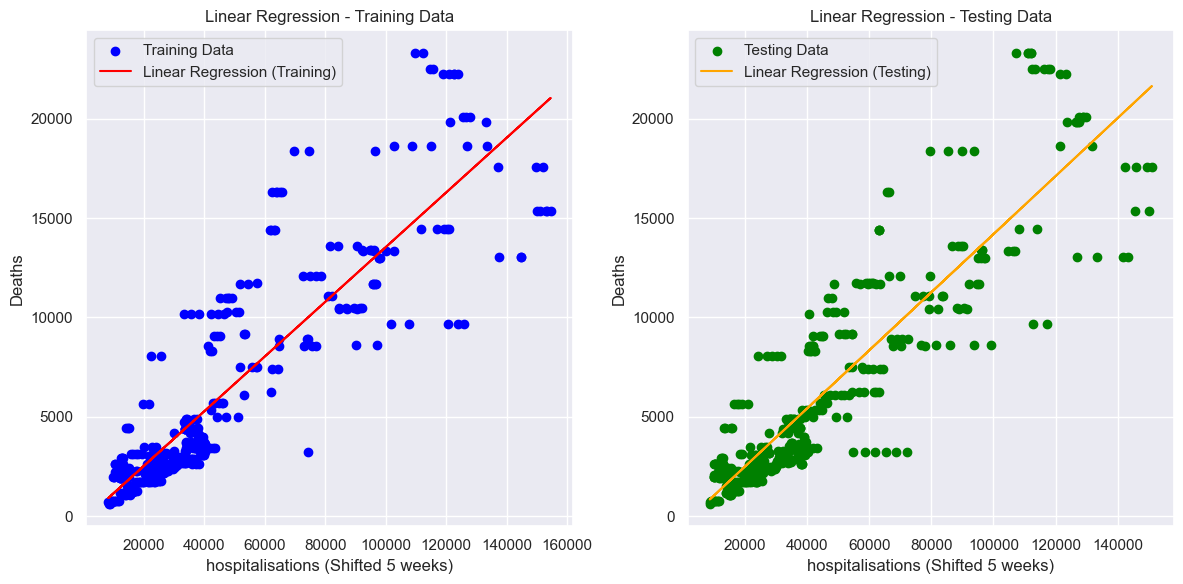

In [117]:
#Hospitalisation shift 5 week 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming X1 and y are your input and target variables
X1 = np.array(hospitalisations_data_5)
y = np.array(deaths_data)

# Ensure X1 and y have the same number of samples
min_samples = min(len(X1), len(y))
X1 = X1[:min_samples]
y = y[:min_samples]

# Filter out NaN values
valid_indices = ~np.isnan(X1.flatten()) & ~np.isnan(y.flatten())
X1 = X1[valid_indices]
y = y[valid_indices]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.5, random_state=42)

# Perform linear regression on training data
model_train = LinearRegression()
model_train.fit(X_train.reshape(-1, 1), y_train)  # Reshape X_train to 2D format as required by scikit-learn

# Perform linear regression on testing data
model_test = LinearRegression()
model_test.fit(X_test.reshape(-1, 1), y_test)  # Reshape X_test to 2D format as required by scikit-learn

# Plot training data points and linear regression line for training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model_train.predict(X_train.reshape(-1, 1)), color='red', label='Linear Regression (Training)')
plt.xlabel('hospitalisations (Shifted 5 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Training Data')
plt.legend()

# Plot testing data points and linear regression line for testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, model_test.predict(X_test.reshape(-1, 1)), color='orange', label='Linear Regression (Testing)')
plt.xlabel('hospitalisations (Shifted 5 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Testing Data')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

In [118]:
from sklearn.metrics import mean_squared_error

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', model_train.intercept_)
print('Coefficients of Regression \t: a = ', model_train.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = model_train.predict(X_train)
y_test_pred = model_test.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_train.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_test.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


Intercept of Regression 	: b =  -226.2881561414706
Coefficients of Regression 	: a =  [0.13764904]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7905354918222995
Mean Squared Error (MSE) 	: 5865589.686818425

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8016586630703812
Mean Squared Error (MSE) 	: 5778556.384013608



## Positive Cases Vs Death 

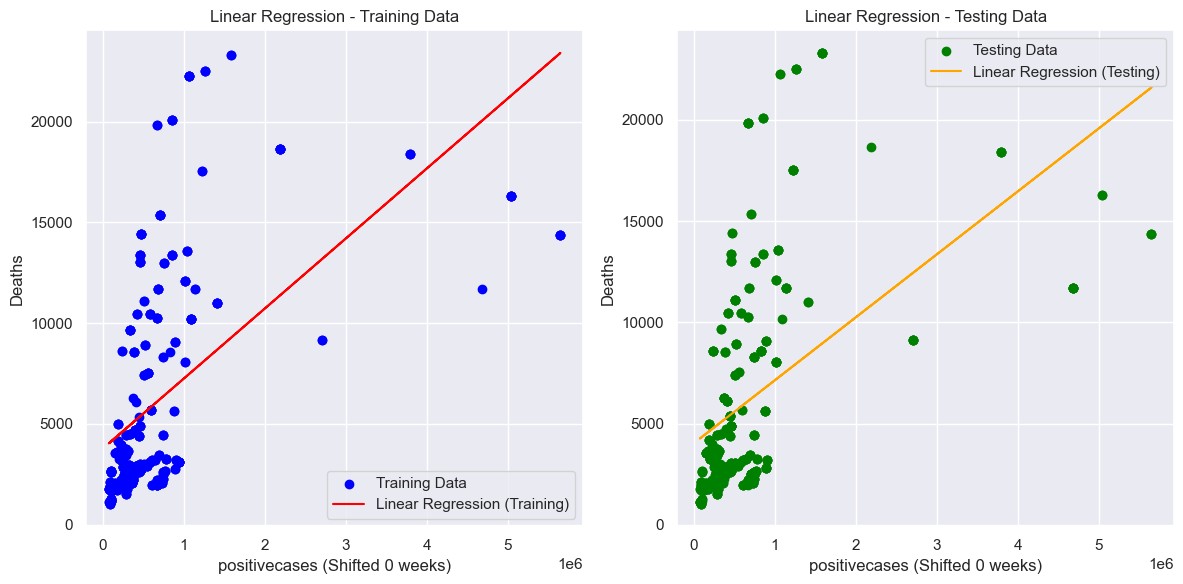

In [119]:
## Positive 0 Week 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming X1 and y are your input and target variables
X1 = np.array(positivecases_data_0)
y = np.array(deaths_data)

# Ensure X1 and y have the same number of samples
min_samples = min(len(X1), len(y))
X1 = X1[:min_samples]
y = y[:min_samples]

# Filter out NaN values
valid_indices = ~np.isnan(X1.flatten()) & ~np.isnan(y.flatten())
X1 = X1[valid_indices]
y = y[valid_indices]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.5, random_state=42)

# Perform linear regression on training data
model_train = LinearRegression()
model_train.fit(X_train.reshape(-1, 1), y_train)  # Reshape X_train to 2D format as required by scikit-learn

# Perform linear regression on testing data
model_test = LinearRegression()
model_test.fit(X_test.reshape(-1, 1), y_test)  # Reshape X_test to 2D format as required by scikit-learn

# Plot training data points and linear regression line for training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model_train.predict(X_train.reshape(-1, 1)), color='red', label='Linear Regression (Training)')
plt.xlabel('positivecases (Shifted 0 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Training Data')
plt.legend()

# Plot testing data points and linear regression line for testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, model_test.predict(X_test.reshape(-1, 1)), color='orange', label='Linear Regression (Testing)')
plt.xlabel('positivecases (Shifted 0 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Testing Data')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

In [120]:
from sklearn.metrics import mean_squared_error

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', model_train.intercept_)
print('Coefficients of Regression \t: a = ', model_train.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = model_train.predict(X_train)
y_test_pred = model_test.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_train.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_test.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()



Intercept of Regression 	: b =  3767.207101630909
Coefficients of Regression 	: a =  [0.00347574]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3052138840106715
Mean Squared Error (MSE) 	: 20337467.534628153

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2620488781330146
Mean Squared Error (MSE) 	: 20629269.415563166



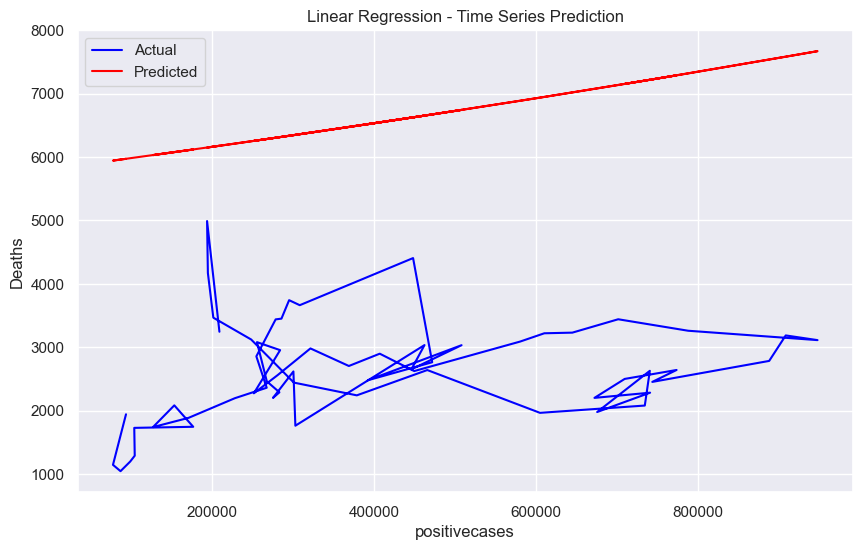

In [121]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Assuming X1 and y are your input and target variables
X1 = np.array(positivecases_data_0)
y = np.array(deaths_data)

# Ensure X1 and y have the same number of samples
min_samples = min(len(X1), len(y))
X1 = X1[:min_samples]
y = y[:min_samples]

# Filter out NaN values
valid_indices = ~np.isnan(X1.flatten()) & ~np.isnan(y.flatten())
X1 = X1[valid_indices]
y = y[valid_indices]

# Split data into train and test sets
split_ratio = 0.5  
split_index = int(len(X1) * split_ratio)

X_train = X1[:split_index]
y_train = y[:split_index]

X_test = X1[split_index:]
y_test = y[split_index:]

# Perform linear regression on training data
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), np.log(y_train + 1))  # Adding 1 to y_train to avoid log(0)

# Predict on test data
y_pred_log = model.predict(X_test.reshape(-1, 1))

# Transform predicted values back to original scale
y_pred = np.exp(y_pred_log) - 1

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, label='Actual', color='blue')
plt.plot(X_test, y_pred, label='Predicted', color='red')
plt.xlabel('positivecases')
plt.ylabel('Deaths')
plt.title('Linear Regression - Time Series Prediction')
plt.legend()
plt.show()

In [122]:
from sklearn.metrics import mean_squared_error

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', model_train.intercept_)
print('Coefficients of Regression \t: a = ', model_train.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = model_train.predict(X_train)
y_test_pred = model_test.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_train.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_test.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()



Intercept of Regression 	: b =  3767.207101630909
Coefficients of Regression 	: a =  [0.00347574]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: -0.02419317867488613
Mean Squared Error (MSE) 	: 33792413.313573524

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -12.47081973741256
Mean Squared Error (MSE) 	: 7719606.197364436



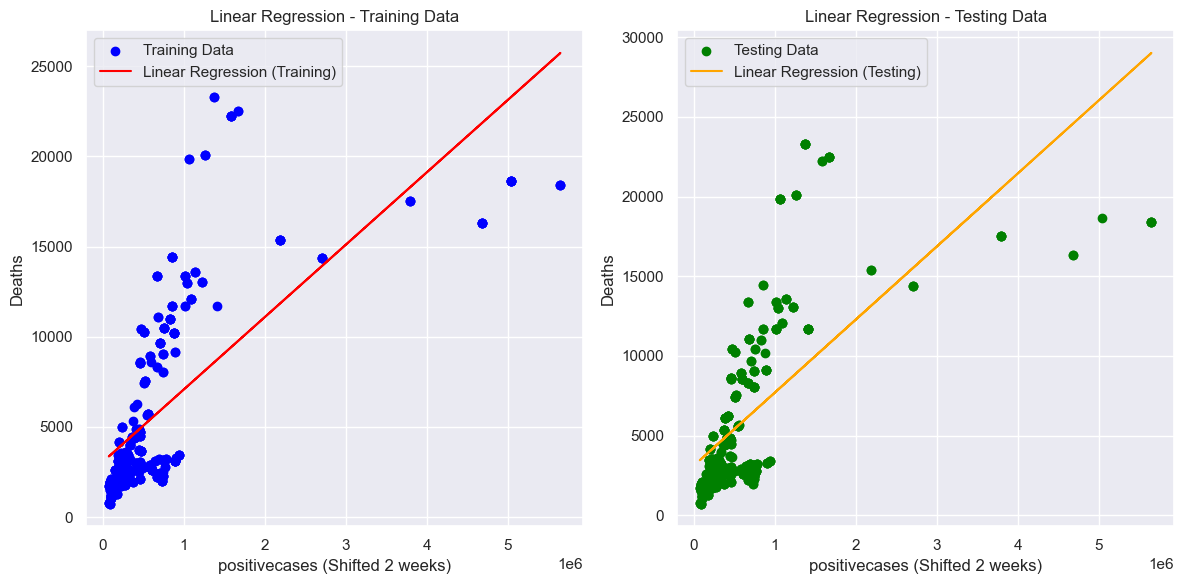

In [123]:
## Positive 2 Week 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming X1 and y are your input and target variables
X1 = np.array(positivecases_data_2)
y = np.array(deaths_data)

# Ensure X1 and y have the same number of samples
min_samples = min(len(X1), len(y))
X1 = X1[:min_samples]
y = y[:min_samples]

# Filter out NaN values
valid_indices = ~np.isnan(X1.flatten()) & ~np.isnan(y.flatten())
X1 = X1[valid_indices]
y = y[valid_indices]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.5, random_state=42)

# Perform linear regression on training data
model_train = LinearRegression()
model_train.fit(X_train.reshape(-1, 1), y_train)  # Reshape X_train to 2D format as required by scikit-learn

# Perform linear regression on testing data
model_test = LinearRegression()
model_test.fit(X_test.reshape(-1, 1), y_test)  # Reshape X_test to 2D format as required by scikit-learn

# Plot training data points and linear regression line for training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model_train.predict(X_train.reshape(-1, 1)), color='red', label='Linear Regression (Training)')
plt.xlabel('positivecases (Shifted 2 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Training Data')
plt.legend()

# Plot testing data points and linear regression line for testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, model_test.predict(X_test.reshape(-1, 1)), color='orange', label='Linear Regression (Testing)')
plt.xlabel('positivecases (Shifted 2 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Testing Data')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

In [124]:
from sklearn.metrics import mean_squared_error

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', model_train.intercept_)
print('Coefficients of Regression \t: a = ', model_train.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = model_train.predict(X_train)
y_test_pred = model_test.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_train.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_test.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()



Intercept of Regression 	: b =  3049.407803978853
Coefficients of Regression 	: a =  [0.00401503]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5011263866119873
Mean Squared Error (MSE) 	: 14176625.941973401

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4467024794279493
Mean Squared Error (MSE) 	: 15915570.757155977



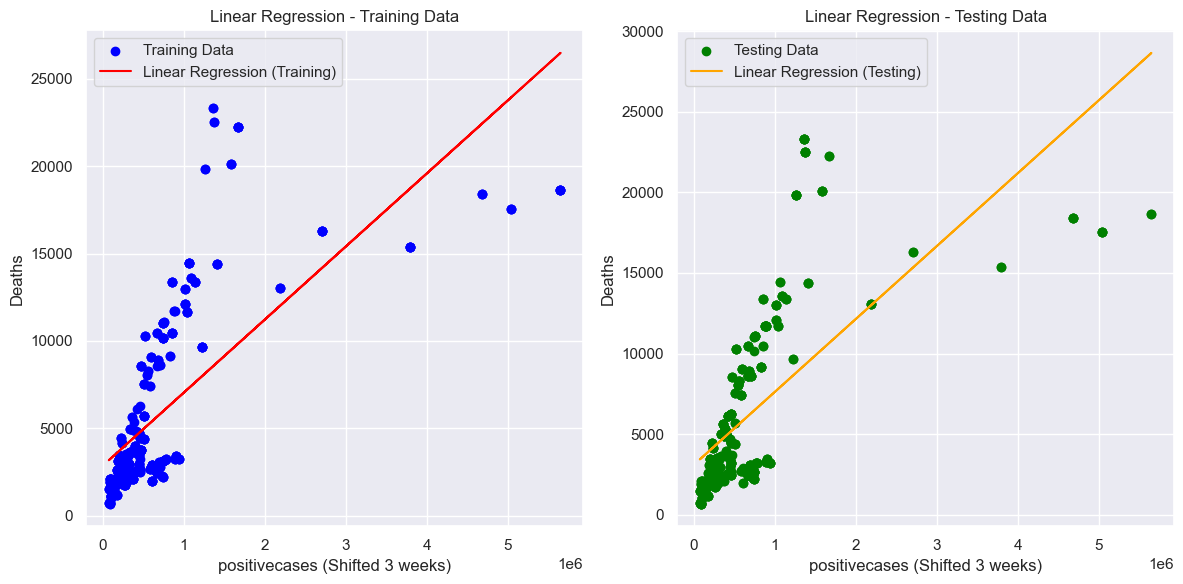

In [126]:
## Positive 3 Week 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming X1 and y are your input and target variables
X1 = np.array(positivecases_data_3)
y = np.array(deaths_data)

# Ensure X1 and y have the same number of samples
min_samples = min(len(X1), len(y))
X1 = X1[:min_samples]
y = y[:min_samples]

# Filter out NaN values
valid_indices = ~np.isnan(X1.flatten()) & ~np.isnan(y.flatten())
X1 = X1[valid_indices]
y = y[valid_indices]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.5, random_state=42)

# Perform linear regression on training data
model_train = LinearRegression()
model_train.fit(X_train.reshape(-1, 1), y_train)  # Reshape X_train to 2D format as required by scikit-learn

# Perform linear regression on testing data
model_test = LinearRegression()
model_test.fit(X_test.reshape(-1, 1), y_test)  # Reshape X_test to 2D format as required by scikit-learn

# Plot training data points and linear regression line for training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model_train.predict(X_train.reshape(-1, 1)), color='red', label='Linear Regression (Training)')
plt.xlabel('positivecases (Shifted 3 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Training Data')
plt.legend()

# Plot testing data points and linear regression line for testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, model_test.predict(X_test.reshape(-1, 1)), color='orange', label='Linear Regression (Testing)')
plt.xlabel('positivecases (Shifted 3 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Testing Data')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

In [127]:
from sklearn.metrics import mean_squared_error

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', model_train.intercept_)
print('Coefficients of Regression \t: a = ', model_train.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = model_train.predict(X_train)
y_test_pred = model_test.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_train.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_test.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()



Intercept of Regression 	: b =  2857.0974095023275
Coefficients of Regression 	: a =  [0.00417852]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5231438420011258
Mean Squared Error (MSE) 	: 13377291.942860888

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4578499839194957
Mean Squared Error (MSE) 	: 15767520.791243356



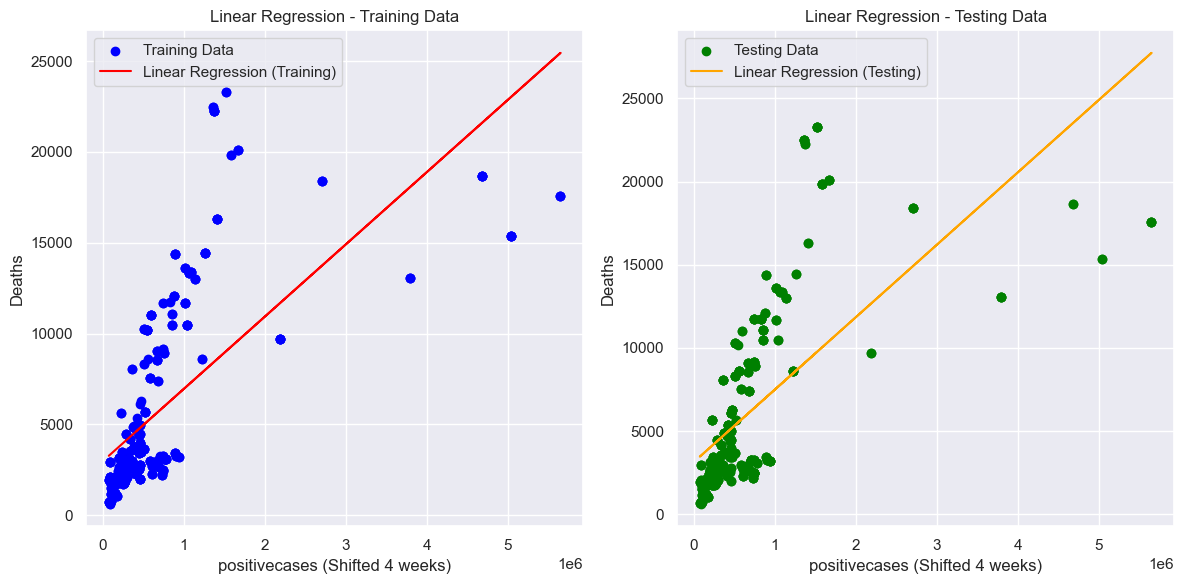

In [128]:
# Positive 4 Week 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming X1 and y are your input and target variables
X1 = np.array(positivecases_data_4)
y = np.array(deaths_data)

# Ensure X1 and y have the same number of samples
min_samples = min(len(X1), len(y))
X1 = X1[:min_samples]
y = y[:min_samples]

# Filter out NaN values
valid_indices = ~np.isnan(X1.flatten()) & ~np.isnan(y.flatten())
X1 = X1[valid_indices]
y = y[valid_indices]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.5, random_state=42)

# Perform linear regression on training data
model_train = LinearRegression()
model_train.fit(X_train.reshape(-1, 1), y_train)  # Reshape X_train to 2D format as required by scikit-learn

# Perform linear regression on testing data
model_test = LinearRegression()
model_test.fit(X_test.reshape(-1, 1), y_test)  # Reshape X_test to 2D format as required by scikit-learn

# Plot training data points and linear regression line for training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model_train.predict(X_train.reshape(-1, 1)), color='red', label='Linear Regression (Training)')
plt.xlabel('positivecases (Shifted 4 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Training Data')
plt.legend()

# Plot testing data points and linear regression line for testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, model_test.predict(X_test.reshape(-1, 1)), color='orange', label='Linear Regression (Testing)')
plt.xlabel('positivecases (Shifted 4 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Testing Data')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

In [129]:
from sklearn.metrics import mean_squared_error

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', model_train.intercept_)
print('Coefficients of Regression \t: a = ', model_train.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = model_train.predict(X_train)
y_test_pred = model_test.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_train.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_test.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


Intercept of Regression 	: b =  2961.71044264624
Coefficients of Regression 	: a =  [0.00398006]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.47014659422638405
Mean Squared Error (MSE) 	: 14837371.254297325

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4318744319760712
Mean Squared Error (MSE) 	: 16551999.088273672



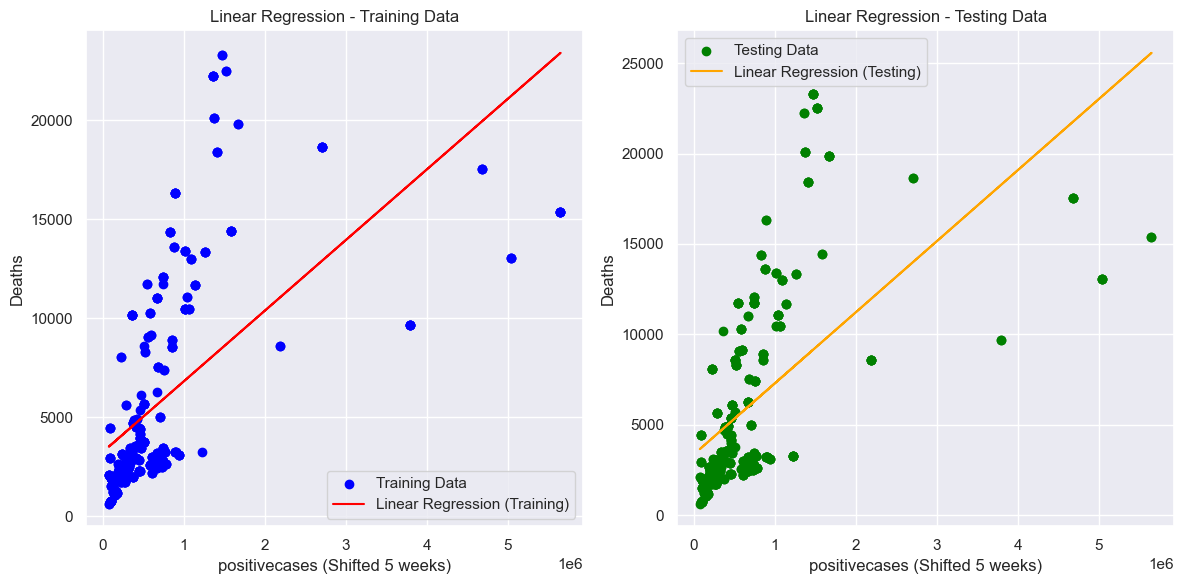

In [130]:
# Positive shift 5 Week 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming X1 and y are your input and target variables
X1 = np.array(positivecases_data_5)
y = np.array(deaths_data)

# Ensure X1 and y have the same number of samples
min_samples = min(len(X1), len(y))
X1 = X1[:min_samples]
y = y[:min_samples]

# Filter out NaN values
valid_indices = ~np.isnan(X1.flatten()) & ~np.isnan(y.flatten())
X1 = X1[valid_indices]
y = y[valid_indices]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.5, random_state=42)

# Perform linear regression on training data
model_train = LinearRegression()
model_train.fit(X_train.reshape(-1, 1), y_train)  # Reshape X_train to 2D format as required by scikit-learn

# Perform linear regression on testing data
model_test = LinearRegression()
model_test.fit(X_test.reshape(-1, 1), y_test)  # Reshape X_test to 2D format as required by scikit-learn

# Plot training data points and linear regression line for training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model_train.predict(X_train.reshape(-1, 1)), color='red', label='Linear Regression (Training)')
plt.xlabel('positivecases (Shifted 5 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Training Data')
plt.legend()

# Plot testing data points and linear regression line for testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, model_test.predict(X_test.reshape(-1, 1)), color='orange', label='Linear Regression (Testing)')
plt.xlabel('positivecases (Shifted 5 weeks)')
plt.ylabel('Deaths')
plt.title('Linear Regression - Testing Data')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

In [131]:
from sklearn.metrics import mean_squared_error

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', model_train.intercept_)
print('Coefficients of Regression \t: a = ', model_train.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = model_train.predict(X_train)
y_test_pred = model_test.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_train.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_test.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()


Intercept of Regression 	: b =  3234.4758219905334
Coefficients of Regression 	: a =  [0.00356934]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3784581702717327
Mean Squared Error (MSE) 	: 17404902.520705413

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.35326524991239383
Mean Squared Error (MSE) 	: 18842230.65516757



# multivariate  

In [132]:
# Find the minimum length among the arrays
min_length = min(len(totalvaccination_data_3), len(hospitalisations_data_3), len(hospitalisations_data_3))

# Truncate the arrays to the minimum length
totalvaccination_data_3 = totalvaccination_data_3[:min_length]
hospitalisations_data_3 = hospitalisations_data_3[:min_length]
hospitalisations_data_3 = hospitalisations_data_3[:min_length]

# Stack the truncated arrays
X = np.column_stack((totalvaccination_data_3, hospitalisations_data_3, hospitalisations_data_3))


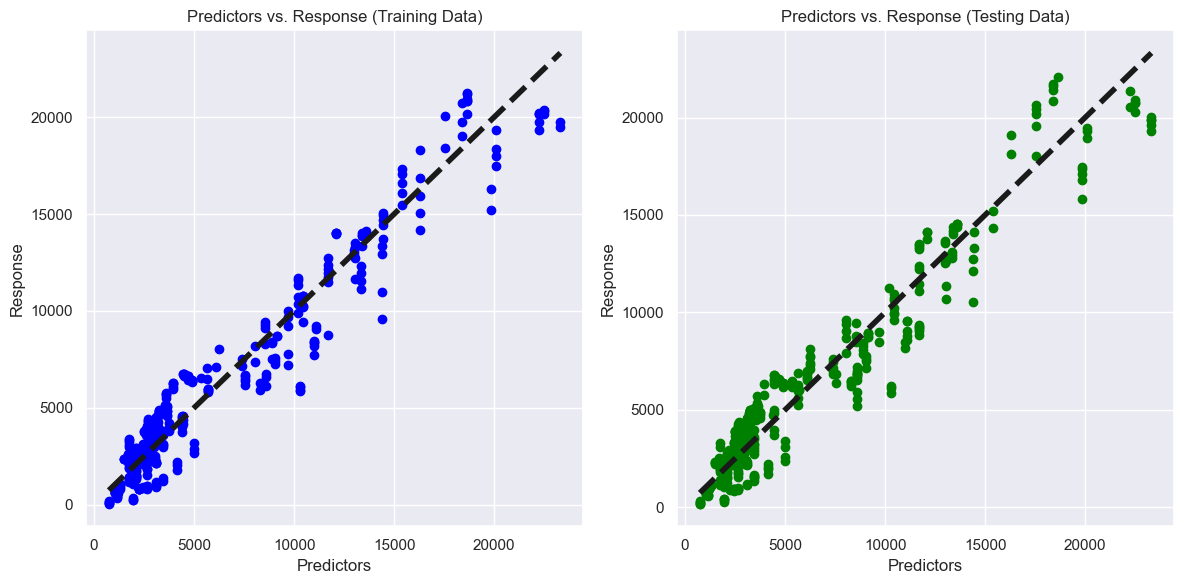

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.937240381534067
Mean Squared Error (MSE) 	: 1837384.008104417

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9289419516304227
Mean Squared Error (MSE) 	: 1985151.0293831239



In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming totalvaccination_data_3, hospitalisations_data_3, and hospitalisations_data_3 are your input features
X = np.column_stack((totalvaccination_data_3, hospitalisations_data_3, hospitalisations_data_3))
y = np.array(deaths_data)

# Ensure X and y have the same number of samples
min_samples = min(len(X), len(y))
X = X[:min_samples]
y = y[:min_samples]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Perform multivariate linear regression on training data
model_train = LinearRegression()
model_train.fit(X_train, y_train)

# Perform multivariate linear regression on testing data
model_test = LinearRegression()
model_test.fit(X_test, y_test)

# Predict values
y_train_pred = model_train.predict(X_train)
y_test_pred = model_test.predict(X_test)

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual vs. predicted values for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.xlabel('Predictors')
plt.ylabel('Response')
plt.title('Predictors vs. Response (Training Data)')

# Plot actual vs. predicted values for testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Predictors')
plt.ylabel('Response')
plt.title('Predictors vs. Response (Testing Data)')

plt.tight_layout()
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model_train.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model_test.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()
